In [1]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import math
from ROOT import RooFit
from ROOT import TChain
from ROOT import RooStats
from datetime import datetime
from uncertainties import ufloat
from scipy.optimize import curve_fit

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
print(r.gROOT.GetVersion())

%jsroot on

c = r.TCanvas()

6.34.04


In [2]:
# Open a ROOT file to the for branches and events
file = r.TFile.Open("Sam_Data/2024_B2OC_UP_B5A.root")  # Replace with the actual file name

file.ls()

# Access the TTree (adjust name if needed)
tree = file.Get("ST-b2oc")  # or "ST-b2cc" depending on your dataset

# List all branch names
branches = tree.GetListOfBranches()
for branch in branches:
    print(branch.GetName())
print(branches.GetEntries())
#if tree:
#    n_entries = min(100, tree.GetEntries())
#    for i in range(n_entries):
#        tree.GetEntry(i)
#        print(f"Event {i}: block =", getattr(tree, "block", None))

event
run
block
GPSTIME
FILL
nLongTracks
nPVs
nVeloTracks
Bp_DTF_OwnPV_CHI2DOF
Bp_DTF_OwnPV_MASS
Bp_DTF_OwnPV_CTAU
Bp_DTF_OwnPV_CTAUERR
Bp_DTF_OwnPV_FD
Bp_M
Bp_PT
Bp_P
Bp_BPVIPCHI2
Db_M
Db_PT
Db_P
Db_BPVIPCHI2
Kp_TRCHI2
Kp_PT
Kp_P
Kp_BPVIPCHI2
Kp_PID_K
Kp_PROBNN_K
Kp_PROBNN_PI
pim_TRCHI2
pim_PT
pim_P
pim_PID_K
pim_BPVIPCHI2
pim_PROBNN_K
pim_PROBNN_PI
pip_PARTICLE_ID
pip_TRCHI2
pip_PT
pip_P
pip_BPVIPCHI2
pip_PID_K
pip_PROBNN_K
pip_PROBNN_PI
nFTClusters
nUTClusters
nVPClusters
46
TFile**		Sam_Data/2024_B2OC_UP_B5A.root	
 TFile*		Sam_Data/2024_B2OC_UP_B5A.root	
  KEY: TTree	ST-b2oc;1	


# Fill Fitting 

In [34]:
import ROOT as r

# ---- Files to clean ----
# file_names = [
#     "2024_B2OC_UP_B8_F10219.root",
#     "2024_B2OC_UP_B5_F10070.root", "2024_B2OC_UP_B5_F10072.root", "2024_B2OC_UP_B5_F10073.root",
#     "2024_B2OC_UP_B5_F10074.root", "2024_B2OC_UP_B5_F10075.root", "2024_B2OC_UP_B5_F10077.root",
#     "2024_B2OC_UP_B5_F10082.root", "2024_B2OC_UP_B5_F10084.root",
#     "2024_B2OC_UP_B5_F10086.root", "2024_B2OC_UP_B5_F10087.root", "2024_B2OC_UP_B5_F10090.root",
#     "2024_B2OC_UP_B5_F10091.root", "2024_B2OC_UP_B5_F10092.root", "2024_B2OC_UP_B5_F10093.root",
#     "2024_B2OC_UP_B5_F10094.root", "2024_B2OC_UP_B5_F10095.root", "2024_B2OC_UP_B5_F10096.root",
#     "2024_B2OC_UP_B5_F10097.root", "2024_B2OC_UP_B5_F10098.root", "2024_B2OC_UP_B5_F10099.root",
#     "2024_B2OC_UP_B5_F10100.root",
#     "2024_B2OC_DOWN_B6_F10104.root", "2024_B2OC_DOWN_B6_F10105.root", "2024_B2OC_DOWN_B6_F10107.root",
#     "2024_B2OC_DOWN_B6_F10112.root", "2024_B2OC_DOWN_B6_F10115.root", "2024_B2OC_DOWN_B6_F10116.root",
#     "2024_B2OC_DOWN_B6_F10118.root", "2024_B2OC_DOWN_B6_F10122.root", "2024_B2OC_DOWN_B6_F10125.root",
#     "2024_B2OC_DOWN_B6_F10126.root", "2024_B2OC_DOWN_B6_F10127.root", "2024_B2OC_DOWN_B6_F10130.root",
#     "2024_B2OC_DOWN_B6_F10132.root", "2024_B2OC_DOWN_B6_F10134.root", "2024_B2OC_DOWN_B6_F10137.root",
#     "2024_B2OC_DOWN_B6_F10138.root",
#     "2024_B2OC_DOWN_B7_F10197.root", "2024_B2OC_DOWN_B7_F10199.root", "2024_B2OC_DOWN_B7_F10200.root",
#     "2024_B2OC_DOWN_B7_F10201.root", "2024_B2OC_DOWN_B7_F10204.root", "2024_B2OC_DOWN_B7_F10206.root",
#     "2024_B2OC_DOWN_B7_F10207.root", "2024_B2OC_DOWN_B7_F10208.root", "2024_B2OC_DOWN_B7_F10209.root",
#     "2024_B2OC_DOWN_B7_F10210.root", "2024_B2OC_DOWN_B7_F10211.root", "2024_B2OC_DOWN_B7_F10213.root",
#     "2024_B2OC_UP_B8_F10216.root", "2024_B2OC_UP_B8_F10218.root", "2024_B2OC_UP_B8_F10219.root",
#     "2024_B2OC_UP_B8_F10222.root", "2024_B2OC_UP_B8_F10223.root", "2024_B2OC_UP_B8_F10225.root",
#     "2024_B2OC_UP_B8_F10226.root", "2024_B2OC_UP_B8_F10230.root", "2024_B2OC_UP_B8_F10232.root",
# ]

file_names = [
    "FDCBpPS/2024_B2OC_UP_B5_F10059.root"
]

# Optional: dedupe the list in case of repeats (keeps first occurrence)
seen = set()
file_names = [f for f in file_names if not (f in seen or seen.add(f))]

for path in file_names:
    print(f"\n=== Cleaning file: {path}")
    f = r.TFile.Open(path, "UPDATE")
    if not f or f.IsZombie():
        print("  ! Could not open file (skipping).")
        continue

    # --- 1) Delete 'fit_results' tree (all cycles) ---
    if f.Get("fit_results"):
        f.Delete("fit_results;*")
        print("  Deleted 'fit_results' tree.")
    else:
        print("  'fit_results' tree not found.")

    # --- 2) Delete all objects named 'dpi_mass_fit_*' (all cycles) ---
    to_delete = []
    keys = f.GetListOfKeys()
    if keys:
        for key in keys:
            name = key.GetName()
            if name.startswith("dpi_mass_fit_"):
                to_delete.append(name)
    if to_delete:
        # Use set to avoid duplicate deletions if multiple cycles appear as multiple keys
        for name in sorted(set(to_delete)):
            f.Delete(f"{name};*")
            print(f"  Deleted '{name};*'")
    else:
        print("  No 'dpi_mass_fit_*' objects found.")

    # --- 3) If multiple ST-b2oc trees exist, keep only the oldest cycle ---
    # Re-fetch keys after deletions
    keys_after = f.GetListOfKeys() or []
    st_keys = [key for key in keys_after if key.GetName() == "ST-b2oc"]
    if len(st_keys) > 1:
        # Sort by cycle number ascending (oldest first)
        st_keys.sort(key=lambda k: k.GetCycle())
        keep_cycle = st_keys[0].GetCycle()
        drop_cycles = [k.GetCycle() for k in st_keys[1:]]
        print(f"  Multiple 'ST-b2oc' trees found ({len(st_keys)} cycles). Keeping cycle {keep_cycle}.")
        for cyc in drop_cycles:
            f.Delete(f"ST-b2oc;{cyc}")
            print(f"    Deleted ST-b2oc;{cyc}")
    elif len(st_keys) == 1:
        print("  Single 'ST-b2oc' tree found.")
    else:
        print("  No 'ST-b2oc' tree found.")

    # Flush metadata (optional)
    f.Write("", r.TObject.kOverwrite)
    f.Close()
    print("  Done.")



=== Cleaning file: FDCBpPS/2024_B2OC_UP_B5_F10059.root
  Deleted 'fit_results' tree.
  Deleted 'dpi_mass_fit_block5_fill10059;*'
  Deleted 'dpi_mass_fit_block5_fill10059_log;*'
  Single 'ST-b2oc' tree found.
  Done.


In [22]:
def validate_root_file(file_path, tree_name="ST-b2oc"):
    """
    Validate a ROOT file and check if the specified tree is accessible.
    Returns: (is_valid, file_obj, tree_obj, error_message)
    """
    import ROOT as r
    import os
    
    # Check if file exists
    if not os.path.exists(file_path):
        return False, None, None, f"File does not exist: {file_path}"
    
    # Check file size
    file_size = os.path.getsize(file_path)
    if file_size == 0:
        return False, None, None, f"File is empty: {file_path}"
    
    try:
        # Try to open the file
        file_obj = r.TFile.Open(file_path)
        if not file_obj or file_obj.IsZombie():
            return False, None, None, f"Cannot open or file is corrupted: {file_path}"
        
        # Try to get the tree
        tree_obj = file_obj.Get(tree_name)
        if not tree_obj:
            # Try alternative tree names
            alt_names = ["ST-b2cc", "ST_b2oc", "b2oc", "DecayTree"]
            for alt_name in alt_names:
                tree_obj = file_obj.Get(alt_name)
                if tree_obj:
                    print(f"Warning: Found tree with alternative name '{alt_name}' instead of '{tree_name}'")
                    tree_name = alt_name
                    break
            
            if not tree_obj:
                file_obj.Close()
                return False, None, None, f"Tree '{tree_name}' not found in file: {file_path}"
        
        # Check if it's actually a TTree
        if not tree_obj.InheritsFrom("TTree"):
            file_obj.Close()
            return False, None, None, f"Object '{tree_name}' is not a TTree: {file_path}"
        
        # Try to access the tree (this will trigger decompression errors if present)
        try:
            entries = tree_obj.GetEntries()
            if entries > 0:
                # Try to read the first entry to ensure the tree is fully accessible
                result = tree_obj.GetEntry(0)
                if result <= 0:
                    file_obj.Close()
                    return False, None, None, f"Cannot read entries from tree '{tree_name}': {file_path}"
            
            return True, file_obj, tree_obj, f"File is valid with {entries} entries"
            
        except Exception as e:
            file_obj.Close()
            return False, None, None, f"Error accessing tree data: {str(e)}"
            
    except Exception as e:
        return False, None, None, f"Exception while opening file: {str(e)}"

# Test the problematic file
file_path = "FDCBpPS/2024_B2OC_UP_B5_F10059.root"
is_valid, file_obj, tree_obj, message = validate_root_file(file_path)

print(f"File validation result: {message}")

if is_valid:
    print(f"✓ File is accessible with {tree_obj.GetEntries()} entries")
    file_obj.Close()
else:
    print(f"✗ File is corrupted or inaccessible")
    
    # Check if there's an alternative file in a different directory
    alternative_paths = [
        "08082025/2024_B2OC_UP_B5_F10059.root",  # Check the 08082025 directory
        "2024_B2OC_UP_B5_F10059.root"  # Check root directory
    ]
    
    print("\nChecking for alternative file locations...")
    found_alternative = False
    
    for alt_path in alternative_paths:
        if os.path.exists(alt_path):
            print(f"Found alternative file: {alt_path}")
            is_valid_alt, file_alt, tree_alt, msg_alt = validate_root_file(alt_path)
            if is_valid_alt:
                print(f"✓ Alternative file is valid: {msg_alt}")
                file_alt.Close()
                found_alternative = True
                break
            else:
                print(f"✗ Alternative file also corrupted: {msg_alt}")
    
    if not found_alternative:
        print("No valid alternative files found.")
        
        # List all similar files in the directory to find working ones
        import glob
        print("\nLooking for other B2OC files to test...")
        pattern = "FDCBpPS/*B2OC*F10*.root"
        similar_files = glob.glob(pattern)[:5]  # Test first 5 files
        
        for test_file in similar_files:
            is_test_valid, file_test, tree_test, msg_test = validate_root_file(test_file)
            if is_test_valid:
                print(f"✓ Working file found: {test_file} - {msg_test}")
                file_test.Close()
                break
            else:
                print(f"✗ {test_file} - {msg_test}")
                
print("\n" + "="*50)

File validation result: Tree 'ST-b2oc' not found in file: FDCBpPS/2024_B2OC_UP_B5_F10059.root
✗ File is corrupted or inaccessible

Checking for alternative file locations...
Found alternative file: 08082025/2024_B2OC_UP_B5_F10059.root
✗ Alternative file also corrupted: Tree 'ST-b2oc' not found in file: 08082025/2024_B2OC_UP_B5_F10059.root
No valid alternative files found.

Looking for other B2OC files to test...
✓ Working file found: FDCBpPS/2024_B2OC_UP_B5_F10097.root - File is valid with 646380 entries



File validation result: Tree 'ST-b2oc' not found in file: FDCBpPS/2024_B2OC_UP_B5_F10059.root
✗ File is corrupted or inaccessible

Checking for alternative file locations...
Found alternative file: 08082025/2024_B2OC_UP_B5_F10059.root
✗ Alternative file also corrupted: Tree 'ST-b2oc' not found in file: 08082025/2024_B2OC_UP_B5_F10059.root
No valid alternative files found.

Looking for other B2OC files to test...
✓ Working file found: FDCBpPS/2024_B2OC_UP_B5_F10097.root - File is valid with 646380 entries



Error R__unzip_header: error in header.  Values: 3030
Error R__unzip_header: error in header.  Values: 3030


In [ ]:
# Robust file processing with corruption handling
def process_files_with_validation(files, base_path="FDCBpPS/", tree_name="ST-b2oc"):
    """
    Process a list of ROOT files with validation and error handling.
    Returns lists of valid and invalid files.
    """
    valid_files = []
    invalid_files = []
    
    for fname in files:
        file_path = f"{base_path}{fname}" if base_path else fname
        print(f"\n▶ Validating {fname}...")
        
        is_valid, file_obj, tree_obj, message = validate_root_file(file_path, tree_name)
        
        if is_valid:
            valid_files.append(fname)
            print(f"✓ {message}")
            
            # You can process the file here if needed
            # For example, create RooDataSet, perform fits, etc.
            
            file_obj.Close()
        else:
            invalid_files.append(fname)
            print(f"✗ {message}")
            
            # Check for alternative locations
            alt_paths = [
                f"08082025/{fname}",
                fname  # root directory
            ]
            
            found_alt = False
            for alt_path in alt_paths:
                if os.path.exists(alt_path):
                    is_alt_valid, file_alt, tree_alt, msg_alt = validate_root_file(alt_path, tree_name)
                    if is_alt_valid:
                        print(f"  ✓ Found working alternative: {alt_path}")
                        valid_files.append(alt_path)  # Use alternative path
                        file_alt.Close()
                        found_alt = True
                        break
            
            if not found_alt:
                print(f"  ✗ No valid alternatives found for {fname}")
    
    return valid_files, invalid_files

# Test with a subset of your files first
test_files = [
    "2024_B2OC_UP_B5_F10059.root",  # Known problematic file
    "2024_B2OC_UP_B5_F10061.root",  # Test another
    "2024_B2OC_UP_B5_F10066.root"   # Test another
]

print("Testing file validation on subset...")
valid, invalid = process_files_with_validation(test_files)

print(f"\n=== SUMMARY ===")
print(f"Valid files: {len(valid)}")
for f in valid:
    print(f"  ✓ {f}")
    
print(f"Invalid files: {len(invalid)}")
for f in invalid:
    print(f"  ✗ {f}")

# If you want to proceed with only valid files:
if valid:
    print(f"\nRecommendation: Process only the {len(valid)} valid files")
    print("You can update your file list to exclude corrupted files.")

In [5]:
#   "2024_B2OC_UP_B5_F10059.root","2024_B2OC_UP_B5_F10061.root", "2024_B2OC_UP_B5_F10066.root", "2024_B2OC_UP_B5_F10069.root",
#   "2024_B2OC_UP_B5_F10070.root", "2024_B2OC_UP_B5_F10072.root", "2024_B2OC_UP_B5_F10073.root",
#   "2024_B2OC_UP_B5_F10074.root", "2024_B2OC_UP_B5_F10075.root","2024_B2OC_UP_B5_F10077.root","2024_B2OC_UP_B5_F10082.root", "2024_B2OC_UP_B5_F10084.root",
#   "2024_B2OC_UP_B5_F10086.root", "2024_B2OC_UP_B5_F10087.root", "2024_B2OC_UP_B5_F10090.root",
#   "2024_B2OC_UP_B5_F10091.root", "2024_B2OC_UP_B5_F10092.root", "2024_B2OC_UP_B5_F10093.root", "2024_B2OC_UP_B5_F10094.root", "2024_B2OC_UP_B5_F10095.root",
#   "2024_B2OC_UP_B5_F10096.root", "2024_B2OC_UP_B5_F10097.root", "2024_B2OC_UP_B5_F10098.root",
#   "2024_B2OC_UP_B5_F10099.root", "2024_B2OC_UP_B5_F10100.root", "2024_B2OC_DOWN_B6_F10104.root", "2024_B2OC_DOWN_B6_F10105.root", "2024_B2OC_DOWN_B6_F10107.root",
#   "2024_B2OC_DOWN_B6_F10112.root", "2024_B2OC_DOWN_B6_F10115.root", "2024_B2OC_DOWN_B6_F10116.root", "2024_B2OC_DOWN_B6_F10118.root", "2024_B2OC_DOWN_B6_F10122.root",
#   "2024_B2OC_DOWN_B6_F10125.root", "2024_B2OC_DOWN_B6_F10126.root", "2024_B2OC_DOWN_B6_F10127.root",
#   "2024_B2OC_DOWN_B6_F10130.root", "2024_B2OC_DOWN_B6_F10132.root", "2024_B2OC_DOWN_B6_F10134.root",
#   "2024_B2OC_DOWN_B6_F10137.root", "2024_B2OC_DOWN_B6_F10138.root", "2024_B2OC_DOWN_B7_F10197.root", "2024_B2OC_DOWN_B7_F10199.root", "2024_B2OC_DOWN_B7_F10200.root",
#   "2024_B2OC_DOWN_B7_F10201.root", "2024_B2OC_DOWN_B7_F10204.root", "2024_B2OC_DOWN_B7_F10206.root",
#   "2024_B2OC_DOWN_B7_F10207.root", "2024_B2OC_DOWN_B7_F10208.root", "2024_B2OC_DOWN_B7_F10209.root",
#   "2024_B2OC_DOWN_B7_F10210.root", "2024_B2OC_DOWN_B7_F10211.root", "2024_B2OC_DOWN_B7_F10213.root", "2024_B2OC_UP_B8_F10216.root",
#   "2024_B2OC_UP_B8_F10218.root", "2024_B2OC_UP_B8_F10219.root", "2024_B2OC_UP_B8_F10222.root",
#   "2024_B2OC_UP_B8_F10223.root", "2024_B2OC_UP_B8_F10225.root", "2024_B2OC_UP_B8_F10226.root",
#   "2024_B2OC_UP_B8_F10230.root", "2024_B2OC_UP_B8_F10232.root"

In [ ]:
from array import array                     # ROOT TTrees need C-style arrays
import re
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
# files = ["2024_B2OC_UP_B5_F10059.root","2024_B2OC_UP_B5_F10061.root", "2024_B2OC_UP_B5_F10066.root", "2024_B2OC_UP_B5_F10069.root",
#     "2024_B2OC_UP_B5_F10070.root", "2024_B2OC_UP_B5_F10072.root", "2024_B2OC_UP_B5_F10073.root",
#     "2024_B2OC_UP_B5_F10074.root", "2024_B2OC_UP_B5_F10075.root","2024_B2OC_UP_B5_F10077.root","2024_B2OC_UP_B5_F10082.root", "2024_B2OC_UP_B5_F10084.root",
#     "2024_B2OC_UP_B5_F10086.root", "2024_B2OC_UP_B5_F10087.root", "2024_B2OC_UP_B5_F10090.root",
#     "2024_B2OC_UP_B5_F10091.root", "2024_B2OC_UP_B5_F10092.root", "2024_B2OC_UP_B5_F10093.root", "2024_B2OC_UP_B5_F10094.root", "2024_B2OC_UP_B5_F10095.root",
#     "2024_B2OC_UP_B5_F10096.root", "2024_B2OC_UP_B5_F10097.root", "2024_B2OC_UP_B5_F10098.root",
#     "2024_B2OC_UP_B5_F10099.root", "2024_B2OC_UP_B5_F10100.root"
# ]

files = [
    "FDCBpPS/2024_B2OC_UP_B5_F10059.root"
]


# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5200, 5450)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5278.46, 5250, 5300)

alpha = r.RooRealVar("alpha", "alpha", 1.25015, 1, 2)
n = r.RooRealVar("n", "n", 2.40748, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 11, 1.0, 30)  
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

tau = r.RooRealVar("tau", "Decay constant", -0.00219122, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -2.2701, -20, -0.01)
n_2 = r.RooRealVar("n2", "n2", 2.47972, 0.05, 50)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 12.7184, 1.0, 20)   
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.65, 0.0, 1.0)

mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(True)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting fill file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2oc")
    if not tree:
        print("ST-b2oc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 0.4)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.75, Nevt * 0.6, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError())
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # === sWeighting block ===
    sData = r.RooStats.SPlot(
        "sData", "sData with sWeights",
        data,
        model,
        r.RooArgList(nsig, nbkg)
    )

    # Add a new branch "sw_sig" to the ST-b2oc tree
    if not tree.FindBranch("sw_sig"):
        sw_buf = array('f', [0.])
        br_sw  = tree.Branch("sw_sig", sw_buf, "sw_sig/F")
    else:
        sw_buf = array('f', [0.])
        br_sw  = tree.GetBranch("sw_sig")
        br_sw.SetAddress(sw_buf)

from array import array                     # ROOT TTrees need C-style arrays
import re
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
# files = ["2024_B2OC_UP_B5_F10059.root","2024_B2OC_UP_B5_F10061.root", "2024_B2OC_UP_B5_F10066.root", "2024_B2OC_UP_B5_F10069.root",
#     "2024_B2OC_UP_B5_F10070.root", "2024_B2OC_UP_B5_F10072.root", "2024_B2OC_UP_B5_F10073.root",
#     "2024_B2OC_UP_B5_F10074.root", "2024_B2OC_UP_B5_F10075.root","2024_B2OC_UP_B5_F10077.root","2024_B2OC_UP_B5_F10082.root", "2024_B2OC_UP_B5_F10084.root",
#     "2024_B2OC_UP_B5_F10086.root", "2024_B2OC_UP_B5_F10087.root", "2024_B2OC_UP_B5_F10090.root",
#     "2024_B2OC_UP_B5_F10091.root", "2024_B2OC_UP_B5_F10092.root", "2024_B2OC_UP_B5_F10093.root", "2024_B2OC_UP_B5_F10094.root", "2024_B2OC_UP_B5_F10095.root",
#     "2024_B2OC_UP_B5_F10096.root", "2024_B2OC_UP_B5_F10097.root", "2024_B2OC_UP_B5_F10098.root",
#     "2024_B2OC_UP_B5_F10099.root", "2024_B2OC_UP_B5_F10100.root"
# ]

files = [
    "FDCBpPS/2024_B2OC_UP_B5_F10059.root"
]


# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5200, 5450)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5278.46, 5250, 5300)

alpha = r.RooRealVar("alpha", "alpha", 1.25015, 1, 2)
n = r.RooRealVar("n", "n", 2.40748, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 11, 1.0, 30)  
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

tau = r.RooRealVar("tau", "Decay constant", -0.00219122, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -2.2701, -20, -0.01)
n_2 = r.RooRealVar("n2", "n2", 2.47972, 0.05, 50)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 12.7184, 1.0, 20)   
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.65, 0.0, 1.0)

mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(True)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting fill file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2oc")
    if not tree:
        print("ST-b2oc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 0.4)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.75, Nevt * 0.6, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError())
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # === sWeighting block ===
    sData = r.RooStats.SPlot(
        "sData", "sData with sWeights",
        data,
        model,
        r.RooArgList(nsig, nbkg)
    )

    # Add a new branch "sw_sig" to the ST-b2oc tree
    if not tree.FindBranch("sw_sig"):
        sw_buf = array('f', [0.])
        br_sw  = tree.Branch("sw_sig", sw_buf, "sw_sig/F")
    else:
        sw_buf = array('f', [0.])
        br_sw  = tree.GetBranch("sw_sig")
        br_sw.SetAddress(sw_buf)

    # Fill sWeights into branch
    nentries = data.numEntries()
    for i in range(nentries):
        tree.GetEntry(i)
        sw_buf[0] = sData.GetSWeight(i, "nsig")  # use variable name instead of index
        br_sw.Fill()

    tree.Write("", r.TObject.kOverwrite)
    print(f"   → sWeights stored: Σ sw_sig = {sum(sw_buf):.1f} (check ≈ nsig)")

    # 4) store results in /fit_results TTree
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])
        res_tree.Branch("status", br_status, "status/I")
        res_tree.Branch("covQual", br_covqual, "covQual/I")
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        # Fix: Check if branch exists before setting address
        if res_tree.FindBranch("status"):
            res_tree.GetBranch("status").SetAddress(br_status)
        else:
            res_tree.Branch("status", br_status, "status/I")
        if res_tree.FindBranch("covQual"):
            res_tree.GetBranch("covQual").SetAddress(br_covqual)
        else:
            res_tree.Branch("covQual", br_covqual, "covQual/I")

    # fill result values
    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F"), r.RooFit.LineColor(r.kGreen + 2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))
    
    match = re.search(r'_B(\d+)_F(\d+)', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match else ""
    title_latex = "B^{+} \\rightarrow \\bar{D}^{0}\\pi^{+}" 

    canvas_name = f"dpi_mass_fit_block{match.group(1)}_fill{match.group(2)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str} {fill_str}" if match else f"{fname} mass fit"

    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+2)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    # Automatic y-axis minimum for log scale 
    x_min_bg = 5400 
    x_max_bg = 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    # Save log-y version
    frame.SetMinimum(ymin * 0.7)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()

    tree.Write("", r.TObject.kOverwrite)
    print(f"   → sWeights stored: Σ sw_sig = {sum(sw_buf):.1f} (check ≈ nsig)")

    # 4) store results in /fit_results TTree
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])
        res_tree.Branch("status", br_status, "status/I")
        res_tree.Branch("covQual", br_covqual, "covQual/I")
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        # Fix: Check if branch exists before setting address
        if res_tree.FindBranch("status"):
            res_tree.GetBranch("status").SetAddress(br_status)
        else:
            res_tree.Branch("status", br_status, "status/I")
        if res_tree.FindBranch("covQual"):
            res_tree.GetBranch("covQual").SetAddress(br_covqual)
        else:
            res_tree.Branch("covQual", br_covqual, "covQual/I")

    # fill result values
    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F"), r.RooFit.LineColor(r.kGreen + 2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))
    
    match = re.search(r'_B(\d+)_F(\d+)', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match else ""
    title_latex = "B^{+} \\rightarrow \\bar{D}^{0}\\pi^{+}" 

    canvas_name = f"dpi_mass_fit_block{match.group(1)}_fill{match.group(2)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str} {fill_str}" if match else f"{fname} mass fit"

    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+2)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    # Automatic y-axis minimum for log scale 
    x_min_bg = 5400 
    x_max_bg = 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    # Save log-y version
    frame.SetMinimum(ymin * 0.7)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()



▶ fitting fill file FDCBpPS/2024_B2OC_UP_B5_F10059.root
entries in tree = 23493

=== fitted yields ===
nsig  = 6779 ± 183
nbkg  = 16715 ± 208
ntot  = 23495 (derived)
0.8097266597263265
background fraction = 0.711452+/-0.006109
fit status = 0, covQual = 3

▶ fitting fill file FDCBpPS/2024_B2OC_UP_B5_F10059.root
entries in tree = 23493

=== fitted yields ===
nsig  = 6779 ± 183
nbkg  = 16715 ± 208
ntot  = 23495 (derived)
0.8097266597263265
background fraction = 0.711452+/-0.006109
fit status = 0, covQual = 3
   → sWeights stored: Σ sw_sig = -0.4 (check ≈ nsig)


SegmentationViolation: none of the 2 overloaded methods succeeded. Full details:
  int TTree::Write(const char* name = nullptr, Int_t option = 0, Int_t bufsize = 0) =>
    SegmentationViolation: segfault in C++; program state was reset
  int TTree::Write(const char* name = nullptr, Int_t option = 0, Int_t bufsize = 0) =>
    SegmentationViolation: segfault in C++; program state was reset

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Bp_DTF_OwnPV_MASS) TTree Float_t branch Bp_DTF_OwnPV_MASS will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5154.31
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5963.82
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because Bp_DTF_OwnPV_MASS cannot accommodate the value 4871.03
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5076.15
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 73288 out-of-range events
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1]

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -85870.94366 Edm =       80.69893199 NCalls =     25
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.112102
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -85870.94366
  Edm           : 19216.61571
  Internal parameters:	[     0.2356918764      0.304692654     0.1388456842    -0.1433475689     0.1433475689      1.477141165]	
  Internal gradient  :	[     -293.9801281     -35.95196704     -186.8788433     -27.50089195      82.50234217      -2389.68069]	
  Internal covariance matrix:
[[     0.40792531      2.2491587   -0.047027491    -0.11918573     0.12635641 -0.00056435478]
 [      2.2491587      12.468798    -0.26062006    -0.65620881     0.69568636  -0.0032629054]
 [   -0.047027491    -0.26062006   0.0057120384    0.013723302   -0.014548899  6.3179316e-05]
 [    -0.119185

: 

In [13]:
import ROOT as r

# ------------------------------------------------------------
file_name = "FDCBpPS/2024_B2OC_UP_B5_F10059.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:

    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\n#### ######entries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  tau   =", res_tree.tau,      "±", res_tree.tau_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("dpi_mass_fit_block5_fill10059"+"_log" )  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

f.ls()

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")

# print ST-b2oc tree branches
tree = f.Get("ST-b2oc")
print(f"####### ######ST-b2oc tree entries: {tree.GetEntries()}")
if tree and tree.InheritsFrom("TTree"):
    print("\n--- ST-b2oc tree branches ---------------------------")
    for br in tree.GetListOfBranches():
        print(" ", br.GetName())
else:
    print("ST-b2oc tree not found or not a TTree.")


# print first 10 entries of data for branch sw_sig
sw_sig_branch = tree.GetBranch("sw_sig")
if sw_sig_branch:
    print("\n--- first 10 entries of 'sw_sig' branch ----------------")
    for i in range(10):
        tree.GetEntry(i)
        print(" ", tree.sw_sig)
else:
    print("sw_sig branch not found.")


--- top-level keys in the file -------------------------
  ST-b2oc : TTree
  fit_results : TTree
  dpi_mass_fit_block5_fill10059 : TCanvas
  dpi_mass_fit_block5_fill10059_log : TCanvas

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err

entries in the tree: 1

first entry snapshot:
  tau   = -0.0012303097736874324 ± 0.00014329819441372127
  nsig   = 6779.408217583454 ± 183.17757041421555
  nbkg   = 16715.461533817506 ± 208.47784835076163
  ntot   = 23494.869751400962 ± 277.51943275348856
  frac_cb_2   = 0.8097266617168801
ST-b2oc tree not found or not a TTree.


ReferenceError: attempt to access a null-pointer

TFile**		FDCBpPS/2024_B2OC_UP_B5_F10059.root	
 TFile*		FDCBpPS/2024_B2OC_UP_B5_F10059.root	
  OBJ: TTree	fit_results	Mass-fit results per fill : 0 at: 0x15267ddf0
  KEY: TTree	ST-b2oc;1	Small Tree
  KEY: TTree	fit_results;1	Mass-fit results per fill
  KEY: TCanvas	dpi_mass_fit_block5_fill10059;1	B^{+} \rightarrow \bar{D}^{0}\pi^{+} Mass Fit, Block 5 Fill 10059
  KEY: TCanvas	dpi_mass_fit_block5_fill10059_log;1	B^{+} \rightarrow \bar{D}^{0}\pi^{+} Mass Fit, Block 5 Fill 10059


Error in <TList::Clear>: A list is accessing an object (0x1229f2490) already deleted (list name = TList)
Error R__unzip_header: error in header.  Values: 3030


In [14]:
file_name = "FDCBpPS/2024_B2OC_UP_B5_F10059.root"
f = r.TFile.Open(file_name)
f.ls()


TFile**		FDCBpPS/2024_B2OC_UP_B5_F10059.root	
 TFile*		FDCBpPS/2024_B2OC_UP_B5_F10059.root	
  KEY: TTree	ST-b2oc;1	Small Tree
  KEY: TTree	fit_results;1	Mass-fit results per fill
  KEY: TCanvas	dpi_mass_fit_block5_fill10059;1	B^{+} \rightarrow \bar{D}^{0}\pi^{+} Mass Fit, Block 5 Fill 10059
  KEY: TCanvas	dpi_mass_fit_block5_fill10059_log;1	B^{+} \rightarrow \bar{D}^{0}\pi^{+} Mass Fit, Block 5 Fill 10059


In [249]:
import ROOT as r

file_name = "2024_B2CC_UP_B5_F10090.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("jpsik_mass_fit_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()

Deleted 'fit_results' tree.
Deleted 'jpsik_mass_fit_block5_fill10090'
Deleted 'jpsik_mass_fit_block5_fill10090_log'


In [2]:
#"2024_B2CC_UP_B5_F10059.root", "2024_B2CC_UP_B5_F10061.root","2024_B2CC_UP_B5_F10066.root", "2024_B2CC_UP_B5_F10069.root","2024_B2CC_UP_B5_F10070.root","2024_B2CC_UP_B5_F10072.root","2024_B2CC_UP_B5_F10073.root",
#    "2024_B2CC_UP_B5_F10074.root", "2024_B2CC_UP_B5_F10075.root", "2024_B2CC_UP_B5_F10077.root","2024_B2CC_UP_B5_F10082.root","2024_B2CC_UP_B5_F10084.root","2024_B2CC_UP_B5_F10086.root","2024_B2CC_UP_B5_F10087.root",
#    "2024_B2CC_UP_B5_F10090.root","2024_B2CC_UP_B5_F10091.root","2024_B2CC_UP_B5_F10092.root","2024_B2CC_UP_B5_F10093.root","2024_B2CC_UP_B5_F10094.root","2024_B2CC_UP_B5_F10095.root","2024_B2CC_UP_B5_F10096.root",
#    "2024_B2CC_UP_B5_F10097.root","2024_B2CC_UP_B5_F10098.root","2024_B2CC_UP_B5_F10099.root","2024_B2CC_UP_B5_F10100.root", "2024_B2CC_DOWN_B6_F10104.root", "2024_B2CC_DOWN_B6_F10105.root", "2024_B2CC_DOWN_B6_F10107.root",
#    "2024_B2CC_DOWN_B6_F10112.root","2024_B2CC_DOWN_B6_F10115.root","2024_B2CC_DOWN_B6_F10116.root","2024_B2CC_DOWN_B6_F10117.root","2024_B2CC_DOWN_B6_F10118.root","2024_B2CC_DOWN_B6_F10122.root","2024_B2CC_DOWN_B6_F10125.root",
#    "2024_B2CC_DOWN_B6_F10126.root","2024_B2CC_DOWN_B6_F10127.root","2024_B2CC_DOWN_B6_F10130.root","2024_B2CC_DOWN_B6_F10132.root","2024_B2CC_DOWN_B6_F10134.root","2024_B2CC_DOWN_B6_F10137.root","2024_B2CC_DOWN_B6_F10138.root",
#    "2024_B2CC_DOWN_B7_F10197.root","2024_B2CC_DOWN_B7_F10199.root","2024_B2CC_DOWN_B7_F10200.root", "2024_B2CC_DOWN_B7_F10201.root","2024_B2CC_DOWN_B7_F10204.root","2024_B2CC_DOWN_B7_F10206.root","2024_B2CC_DOWN_B7_F10207.root",
#    "2024_B2CC_DOWN_B7_F10208.root","2024_B2CC_DOWN_B7_F10209.root","2024_B2CC_DOWN_B7_F10210.root","2024_B2CC_DOWN_B7_F10211.root", "2024_B2CC_DOWN_B7_F10213.root","2024_B2CC_UP_B8_F10214.root","2024_B2CC_UP_B8_F10215.root","2024_B2CC_UP_B8_F10216.root","2024_B2CC_UP_B8_F10218.root","2024_B2CC_UP_B8_F10219.root",
#    "2024_B2CC_UP_B8_F10222.root", "2024_B2CC_UP_B8_F10223.root", "2024_B2CC_UP_B8_F10225.root","2024_B2CC_UP_B8_F10226.root","2024_B2CC_UP_B8_F10230.root","2024_B2CC_UP_B8_F10232.root"

In [14]:
import ROOT as r

# ---- Files to clean (B2CC) ----
file_names = [
    "2024_B2CC_UP_B5_F10059.root", "2024_B2CC_UP_B5_F10061.root", "2024_B2CC_UP_B5_F10066.root",
    "2024_B2CC_UP_B5_F10069.root", "2024_B2CC_UP_B5_F10070.root", "2024_B2CC_UP_B5_F10072.root",
    "2024_B2CC_UP_B5_F10073.root", "2024_B2CC_UP_B5_F10074.root", "2024_B2CC_UP_B5_F10075.root",
    "2024_B2CC_UP_B5_F10077.root", "2024_B2CC_UP_B5_F10082.root", "2024_B2CC_UP_B5_F10084.root",
    "2024_B2CC_UP_B5_F10086.root", "2024_B2CC_UP_B5_F10087.root", "2024_B2CC_UP_B5_F10090.root",
    "2024_B2CC_UP_B5_F10091.root", "2024_B2CC_UP_B5_F10092.root", "2024_B2CC_UP_B5_F10093.root",
    "2024_B2CC_UP_B5_F10094.root", "2024_B2CC_UP_B5_F10095.root", "2024_B2CC_UP_B5_F10096.root",
    "2024_B2CC_UP_B5_F10097.root", "2024_B2CC_UP_B5_F10098.root", "2024_B2CC_UP_B5_F10099.root",
    "2024_B2CC_UP_B5_F10100.root",

    "2024_B2CC_DOWN_B6_F10104.root", "2024_B2CC_DOWN_B6_F10105.root", "2024_B2CC_DOWN_B6_F10107.root",
    "2024_B2CC_DOWN_B6_F10112.root", "2024_B2CC_DOWN_B6_F10115.root", "2024_B2CC_DOWN_B6_F10116.root",
    "2024_B2CC_DOWN_B6_F10117.root", "2024_B2CC_DOWN_B6_F10118.root", "2024_B2CC_DOWN_B6_F10122.root",
    "2024_B2CC_DOWN_B6_F10125.root", "2024_B2CC_DOWN_B6_F10126.root", "2024_B2CC_DOWN_B6_F10127.root",
    "2024_B2CC_DOWN_B6_F10130.root", "2024_B2CC_DOWN_B6_F10132.root", "2024_B2CC_DOWN_B6_F10134.root",
    "2024_B2CC_DOWN_B6_F10137.root", "2024_B2CC_DOWN_B6_F10138.root",

    "2024_B2CC_DOWN_B7_F10197.root", "2024_B2CC_DOWN_B7_F10199.root", "2024_B2CC_DOWN_B7_F10200.root",
    "2024_B2CC_DOWN_B7_F10201.root", "2024_B2CC_DOWN_B7_F10204.root", "2024_B2CC_DOWN_B7_F10206.root",
    "2024_B2CC_DOWN_B7_F10207.root", "2024_B2CC_DOWN_B7_F10208.root", "2024_B2CC_DOWN_B7_F10209.root",
    "2024_B2CC_DOWN_B7_F10210.root", "2024_B2CC_DOWN_B7_F10211.root", "2024_B2CC_DOWN_B7_F10213.root",

    "2024_B2CC_UP_B8_F10214.root", "2024_B2CC_UP_B8_F10215.root", "2024_B2CC_UP_B8_F10216.root",
    "2024_B2CC_UP_B8_F10218.root", "2024_B2CC_UP_B8_F10219.root", "2024_B2CC_UP_B8_F10222.root",
    "2024_B2CC_UP_B8_F10223.root", "2024_B2CC_UP_B8_F10225.root", "2024_B2CC_UP_B8_F10226.root",
    "2024_B2CC_UP_B8_F10230.root", "2024_B2CC_UP_B8_F10232.root",
]

# Optional: dedupe the list in case of repeats (keeps first occurrence)
seen = set()
file_names = [f for f in file_names if not (f in seen or seen.add(f))]

for path in file_names:
    print(f"\n=== Cleaning file: {path}")
    f = r.TFile.Open(path, "UPDATE")
    if not f or f.IsZombie():
        print("  ! Could not open file (skipping).")
        continue

    # --- 1) Delete 'fit_results' tree (all cycles) ---
    if f.Get("fit_results"):
        f.Delete("fit_results;*")
        print("  Deleted 'fit_results' tree.")
    else:
        print("  'fit_results' tree not found.")

    # --- 2) Delete all objects named 'dpi_mass_fit_*' (all cycles) ---
    to_delete = []
    keys = f.GetListOfKeys()
    if keys:
        for key in keys:
            name = key.GetName()
            if name.startswith("dpi_mass_fit_"):
                to_delete.append(name)
    if to_delete:
        for name in sorted(set(to_delete)):
            f.Delete(f"{name};*")
            print(f"  Deleted '{name};*'")
    else:
        print("  No 'dpi_mass_fit_*' objects found.")

    # --- 3) If multiple ST-b2cc trees exist, keep only the oldest cycle ---
    keys_after = f.GetListOfKeys() or []
    st_keys = [key for key in keys_after if key.GetName() == "ST-b2cc"]
    if len(st_keys) > 1:
        st_keys.sort(key=lambda k: k.GetCycle())  # oldest first
        keep_cycle = st_keys[0].GetCycle()
        drop_cycles = [k.GetCycle() for k in st_keys[1:]]
        print(f"  Multiple 'ST-b2cc' trees found ({len(st_keys)} cycles). Keeping cycle {keep_cycle}.")
        for cyc in drop_cycles:
            f.Delete(f"ST-b2cc;{cyc}")
            print(f"    Deleted ST-b2cc;{cyc}")
    elif len(st_keys) == 1:
        print("  Single 'ST-b2cc' tree found.")
    else:
        print("  No 'ST-b2cc' tree found.")

    # Flush metadata (optional)
    f.Write("", r.TObject.kOverwrite)
    f.Close()
    print("  Done.")



=== Cleaning file: 2024_B2CC_UP_B5_F10059.root
  Deleted 'fit_results' tree.
  No 'dpi_mass_fit_*' objects found.
  Multiple 'ST-b2cc' trees found (2 cycles). Keeping cycle 1.
    Deleted ST-b2cc;2
  Done.

=== Cleaning file: 2024_B2CC_UP_B5_F10061.root
  Deleted 'fit_results' tree.
  No 'dpi_mass_fit_*' objects found.
  Multiple 'ST-b2cc' trees found (2 cycles). Keeping cycle 4.
    Deleted ST-b2cc;5
  Done.

=== Cleaning file: 2024_B2CC_UP_B5_F10066.root
  Deleted 'fit_results' tree.
  No 'dpi_mass_fit_*' objects found.
  Multiple 'ST-b2cc' trees found (2 cycles). Keeping cycle 4.
    Deleted ST-b2cc;5
  Done.

=== Cleaning file: 2024_B2CC_UP_B5_F10069.root
  Deleted 'fit_results' tree.
  No 'dpi_mass_fit_*' objects found.
  Multiple 'ST-b2cc' trees found (2 cycles). Keeping cycle 10.
    Deleted ST-b2cc;11
  Done.

=== Cleaning file: 2024_B2CC_UP_B5_F10070.root
  Deleted 'fit_results' tree.
  No 'dpi_mass_fit_*' objects found.
  Multiple 'ST-b2cc' trees found (2 cycles). Keeping cy

In [ ]:
import ROOT as r
from array import array
from uncertainties import ufloat
import re

r.EnableImplicitMT()  # RooFit multithreading

# ---- Files to run ----
file_names = [
    "2024_B2CC_UP_B5_F10059.root", "2024_B2CC_UP_B5_F10061.root", "2024_B2CC_UP_B5_F10066.root",
    "2024_B2CC_UP_B5_F10069.root", "2024_B2CC_UP_B5_F10070.root", "2024_B2CC_UP_B5_F10072.root",
    "2024_B2CC_UP_B5_F10073.root", "2024_B2CC_UP_B5_F10074.root", "2024_B2CC_UP_B5_F10075.root",
    "2024_B2CC_UP_B5_F10077.root", "2024_B2CC_UP_B5_F10082.root", "2024_B2CC_UP_B5_F10084.root",
    "2024_B2CC_UP_B5_F10086.root", "2024_B2CC_UP_B5_F10087.root", "2024_B2CC_UP_B5_F10090.root",
    "2024_B2CC_UP_B5_F10091.root", "2024_B2CC_UP_B5_F10092.root", "2024_B2CC_UP_B5_F10093.root",
    "2024_B2CC_UP_B5_F10094.root", "2024_B2CC_UP_B5_F10095.root", "2024_B2CC_UP_B5_F10096.root",
    "2024_B2CC_UP_B5_F10097.root", "2024_B2CC_UP_B5_F10098.root", "2024_B2CC_UP_B5_F10099.root",
    "2024_B2CC_UP_B5_F10100.root",

    "2024_B2CC_DOWN_B6_F10104.root", "2024_B2CC_DOWN_B6_F10105.root", "2024_B2CC_DOWN_B6_F10107.root",
    "2024_B2CC_DOWN_B6_F10112.root", "2024_B2CC_DOWN_B6_F10115.root", "2024_B2CC_DOWN_B6_F10116.root",
    "2024_B2CC_DOWN_B6_F10117.root", "2024_B2CC_DOWN_B6_F10118.root", "2024_B2CC_DOWN_B6_F10122.root",
    "2024_B2CC_DOWN_B6_F10125.root", "2024_B2CC_DOWN_B6_F10126.root", "2024_B2CC_DOWN_B6_F10127.root",
    "2024_B2CC_DOWN_B6_F10130.root", "2024_B2CC_DOWN_B6_F10132.root", "2024_B2CC_DOWN_B6_F10134.root",
    "2024_B2CC_DOWN_B6_F10137.root", "2024_B2CC_DOWN_B6_F10138.root",

    "2024_B2CC_DOWN_B7_F10197.root", "2024_B2CC_DOWN_B7_F10199.root", "2024_B2CC_DOWN_B7_F10200.root",
    "2024_B2CC_DOWN_B7_F10201.root", "2024_B2CC_DOWN_B7_F10204.root", "2024_B2CC_DOWN_B7_F10206.root",
    "2024_B2CC_DOWN_B7_F10207.root", "2024_B2CC_DOWN_B7_F10208.root", "2024_B2CC_DOWN_B7_F10209.root",
    "2024_B2CC_DOWN_B7_F10210.root", "2024_B2CC_DOWN_B7_F10211.root", "2024_B2CC_DOWN_B7_F10213.root",

    "2024_B2CC_UP_B8_F10214.root", "2024_B2CC_UP_B8_F10215.root", "2024_B2CC_UP_B8_F10216.root",
    "2024_B2CC_UP_B8_F10218.root", "2024_B2CC_UP_B8_F10219.root", "2024_B2CC_UP_B8_F10222.root",
    "2024_B2CC_UP_B8_F10223.root", "2024_B2CC_UP_B8_F10225.root", "2024_B2CC_UP_B8_F10226.root",
    "2024_B2CC_UP_B8_F10230.root", "2024_B2CC_UP_B8_F10232.root",
]


# ---- Shape parameters (B+ -> J/psi K+) ----
x = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5200, 5450)  # MeV/c^2

mean = r.RooRealVar("mean", "mean", 5279.38, 5250, 5300)

tau = r.RooRealVar("tau", "Decay constant", -0.00107319, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha = r.RooRealVar("alpha", "alpha", 1.59501, 0.1, 2)
n = r.RooRealVar("n", "n", 2.75673, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 7.2753, 5, 10)
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -1.29179, -1.5, -0.1)
n_2 = r.RooRealVar("n2", "n2", 5.29, 0.5, 10)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 8.21279, 5, 10)
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.5, 0.0, 1.0)

# Float/fix
mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(True)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# ---- Loop over files ----
for fname in file_names:

    print(f"\n▶ fitting fill file {fname}")

    f = r.TFile.Open(fname, "UPDATE")
    if not f or f.IsZombie():
        print("  ! Could not open file, skipping.")
        continue

    tree = f.Get("ST-b2cc")
    if not tree:
        print("  ST-b2cc tree not found, skipping")
        f.Close()
        continue

    # Convert to RooDataSet
    data = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt = data.numEntries()
    print(f"  entries in tree = {Nevt}")

    # Yields and model
    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 0.4)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.75, Nevt * 0.6, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot", "@0+@1", r.RooArgList(nsig, nbkg))

    sig_pdf = r.RooAddPdf("sig", "", r.RooArgList(crystal_ball_2, crystal_ball),
                          r.RooArgList(frac_cb_2))
    model = r.RooAddPdf("model", "sig+bkg", r.RooArgList(sig_pdf, background),
                        r.RooArgList(nsig, nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"  nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"  nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"  ntot  = {ntot.getVal():.0f} (derived)")
    print(f"  frac_cb_2 = {frac_cb_2.getVal():.3f}")
    sig_u = ufloat(nsig.getVal(), nsig.getError())
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)
    print(f"  background fraction = {frac_bkg:.6f}")
    print(f"  fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # === sWeighting (signal) ===
    sData = r.RooStats.SPlot("sData", "sData with sWeights", data, model, r.RooArgList(nsig, nbkg))

    # Create/attach branch "sw_sig"
    if not tree.FindBranch("sw_sig"):
        sw_buf = array('f', [0.])
        br_sw = tree.Branch("sw_sig", sw_buf, "sw_sig/F")
    else:
        sw_buf = array('f', [0.])
        br_sw = tree.GetBranch("sw_sig")
        br_sw.SetAddress(sw_buf)

    # Copy per-event sWeight to the tree (use variable name for clarity)
    nentries = data.numEntries()
    total_sw = 0.0
    for i in range(nentries):
        tree.GetEntry(i)
        sw_val = sData.GetSWeight(i, "nsig")
        sw_buf[0] = sw_val
        br_sw.Fill()
        total_sw += sw_val

    tree.Write("", r.TObject.kOverwrite)
    print(f"   → sWeights stored: Σ sw_sig = {total_sw:.1f} (check ≈ nsig={nsig.getVal():.1f})")

    # === Store results in /fit_results TTree ===
    f.cd()
    res_tree = f.Get("fit_results")

    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf

        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")

        br_status  = array('i', [0])
        br_covqual = array('i', [0])
        res_tree.Branch("status",  br_status,  "status/I")
        res_tree.Branch("covQual", br_covqual, "covQual/I")

    else:
        br_mean           = array('d', [0.]); res_tree.GetBranch("mean").SetAddress(br_mean)
        br_mean_e         = array('d', [0.]); res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        br_alpha          = array('d', [0.]); res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        br_alpha_e        = array('d', [0.]); res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        br_n              = array('d', [0.]); res_tree.GetBranch("n1").SetAddress(br_n)
        br_n_e            = array('d', [0.]); res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        br_cb_sigma       = array('d', [0.]); res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        br_cb_sigma_e     = array('d', [0.]); res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        br_tau            = array('d', [0.]); res_tree.GetBranch("tau").SetAddress(br_tau)
        br_tau_e          = array('d', [0.]); res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        br_alpha_2        = array('d', [0.]); res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        br_alpha_2_e      = array('d', [0.]); res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        br_n_2            = array('d', [0.]); res_tree.GetBranch("n2").SetAddress(br_n_2)
        br_n_2_e          = array('d', [0.]); res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        br_cb_sigma_2     = array('d', [0.]); res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        br_cb_sigma_2_e   = array('d', [0.]); res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        br_frac_cb_2      = array('d', [0.]); res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        br_frac_cb_2_e    = array('d', [0.]); res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        br_Nevt           = array('d', [0.]); res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        br_nsig           = array('d', [0.]); res_tree.GetBranch("nsig").SetAddress(br_nsig)
        br_nsig_e         = array('d', [0.]); res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        br_nbkg           = array('d', [0.]); res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        br_nbkg_e         = array('d', [0.]); res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        br_ntot           = array('d', [0.]); res_tree.GetBranch("ntot").SetAddress(br_ntot)
        br_ntot_e         = array('d', [0.]); res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)

        br_status  = array('i', [0])
        br_covqual = array('i', [0])
        if res_tree.FindBranch("status"):
            res_tree.GetBranch("status").SetAddress(br_status)
        else:
            res_tree.Branch("status", br_status, "status/I")
        if res_tree.FindBranch("covQual"):
            res_tree.GetBranch("covQual").SetAddress(br_covqual)
        else:
            res_tree.Branch("covQual", br_covqual, "covQual/I")

    # Fill results
    br_mean[0]        = mean.getVal();      br_mean_e[0]      = mean.getError()
    br_alpha[0]       = alpha.getVal();     br_alpha_e[0]     = alpha.getError()
    br_n[0]           = n.getVal();         br_n_e[0]         = n.getError()
    br_cb_sigma[0]    = cb_sigma.getVal();  br_cb_sigma_e[0]  = cb_sigma.getError()
    br_tau[0]         = tau.getVal();       br_tau_e[0]       = tau.getError()
    br_alpha_2[0]     = alpha_2.getVal();   br_alpha_2_e[0]   = alpha_2.getError()
    br_n_2[0]         = n_2.getVal();       br_n_2_e[0]       = n_2.getError()
    br_cb_sigma_2[0]  = cb_sigma_2.getVal(); br_cb_sigma_2_e[0] = cb_sigma_2.getError()
    br_frac_cb_2[0]   = frac_cb_2.getVal(); br_frac_cb_2_e[0] = frac_cb_2.getError()
    br_Nevt[0]        = Nevt
    br_nsig[0]        = nsig.getVal();      br_nsig_e[0]      = nsig.getError()
    br_nbkg[0]        = nbkg.getVal();      br_nbkg_e[0]      = nbkg.getError()
    ntot_u            = sig_u + bkg_u
    br_ntot[0]        = ntot_u.n;           br_ntot_e[0]      = ntot_u.s
    br_status[0]      = fit_res.status();   br_covqual[0]     = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # ---- Make & save the canvas (linear + log) ----
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.FillColor(r.kGreen + 2),
                 r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F"),
                 r.RooFit.LineColor(r.kGreen + 2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))

    match = re.search(r'_B(\d+)_F(\d+)', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str  = f"Fill {match.group(2)}" if match else ""
    title_latex = "B^{+} \\rightarrow J/\\psi K^{+}"

    canvas_name = f"jpsik_mass_fit_block{match.group(1)}_fill{match.group(2)}" if match else f"mass_fit_{fname}"
    plot_title  = f"{title_latex} Mass Fit, {block_str} {fill_str}" if match else f"{fname} mass fit"

    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen + 2)
    dummy_bg.SetLineColor(r.kGreen + 2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name)

    # Log-y version
    x_min_bg, x_max_bg = 5400, 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    frame.SetMinimum(ymin * 0.8)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()



▶ fitting fill file 2024_B2CC_UP_B5_F10059.root
  entries in tree = 88412

=== fitted yields ===
  nsig  = 6489 ± 180
  nbkg  = 81923 ± 328
  ntot  = 88411 (derived)
  frac_cb_2 = 0.628
  background fraction = 0.926607+/-0.001901
  fit status = 0, covQual = 3
   → sWeights stored: Σ sw_sig = 6489.4 (check ≈ nsig=6489.4)

▶ fitting fill file 2024_B2CC_UP_B5_F10061.root
  entries in tree = 353769

=== fitted yields ===
  nsig  = 25929 ± 362
  nbkg  = 327839 ± 658
  ntot  = 353768 (derived)
  frac_cb_2 = 0.639
  background fraction = 0.926706+/-0.000958
  fit status = 3, covQual = 3
   → sWeights stored: Σ sw_sig = 25929.2 (check ≈ nsig=25929.2)

▶ fitting fill file 2024_B2CC_UP_B5_F10066.root
  entries in tree = 354042

=== fitted yields ===
  nsig  = 26587 ± 375
  nbkg  = 327465 ± 665
  ntot  = 354052 (derived)
  frac_cb_2 = 0.723
  background fraction = 0.924906+/-0.000990
  fit status = 0, covQual = 3
   → sWeights stored: Σ sw_sig = 26587.2 (check ≈ nsig=26587.2)

▶ fitting fill fil

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -427237.6855 Edm =       8294.954024 NCalls =     27
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 2.03796
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -427237.6855
  Edm           : 35338.96567
  Internal parameters:	[     0.2891274493                0     0.1761089065    -0.1433475689     0.1433475689      1.505265445]	
  Internal gradient  :	[     -708.2425101     -348.1608863     -208.6484651     -2056.358659      6169.072897       -9875.8241]	
  Internal covariance matrix:
[[     0.62395409      1.1178431  -0.0039473117   -0.028112699    0.078934486    8.31863e-05]
 [      1.1178431      2.0083047  -0.0070941836   -0.050429212     0.14159448  0.00014722972]
 [  -0.0039473117  -0.0070941836  5.2446305e-05  0.00017812196 -0.00050012877 -6.5450733e-07]
 [   -0.02811269

In [16]:
import ROOT as r

# ------------------------------------------------------------
file_name = "2024_B2CC_UP_B5_F10090.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("jpsik_mass_fit_block5_fill10090" + "_log" )  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")

# print ST-b2cc tree brnaches
tree = f.Get("ST-b2cc")
if tree and tree.InheritsFrom("TTree"):
    print("\n--- ST-b2cc tree branches ---------------------------")
    for br in tree.GetListOfBranches():
        print(" ", br.GetName())
else:
    print("ST-b2cc tree not found or not a TTree.") 


# print first 10 entries of data for branch sw_sig
sw_sig_branch = tree.GetBranch("sw_sig")
if sw_sig_branch:
    print("\n--- first 10 entries of 'sw_sig' branch ----------------")
    for i in range(10):
        tree.GetEntry(i)
        print(" ", tree.sw_sig)
else:
    print("sw_sig branch not found.")


--- top-level keys in the file -------------------------
  jpsik_mass_fit_block5_fill10090 : TCanvas
  jpsik_mass_fit_block5_fill10090 : TCanvas
  jpsik_mass_fit_block5_fill10090_log : TCanvas
  jpsik_mass_fit_block5_fill10090_log : TCanvas
  ST-b2cc : TTree
  fit_results : TTree

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err
  status
  covQual

entries in the tree: 1

first entry snapshot:
  mean   = 5279.338898612101 ± 0.08181904758657765
  nsig   = 68498.6124595912 ± 480.7825785629057
  nbkg   = 817499.4471530952 ± 990.1373901963415
  nsig   = 68498.6124595912 ± 480.7825785629057
  frac_cb_2   = 0.6932594063221375

--- ST-b2cc tree branches ---------------------------
  event
  run
  block
  GPSTIME
  FILL
  nLongTracks
  nPV

# Block Fitting 

In [3]:
import ROOT as r

file_name = "Sam_Data/2024_B2OC_UP_B5A.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("dpi_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()


'fit_results' tree not found.


In [6]:
# Mass fit + sWeights written back to the same tree + results tree + plots
# -----------------------------------------------------------------------
import math
import re
from array import array
from uncertainties import ufloat
import ROOT as r

r.EnableImplicitMT()

# ---------------- 1) Config ----------------
files = [
    "Sam_Data/2024_B2OC_UP_B5A.root",
]

xname = "Bp_DTF_OwnPV_MASS"  # mass branch name in the tree
xmin, xmax = 5200.0, 5450.0  # fit window (MeV)

# ---------------- 2) Observable and PDFs ----------------
x = r.RooRealVar(xname, "B^{+} mass", xmin, xmax)

mean = r.RooRealVar("mean", "mean", 5278.46, 5250, 5300)

alpha     = r.RooRealVar("alpha", "alpha", 1.25015, 1, 2)
n         = r.RooRealVar("n", "n", 2.40748, 0.5, 5)
cb_sigma  = r.RooRealVar("cb_sigma", "cb_sigma", 11, 1.0, 30)
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

tau        = r.RooRealVar("tau", "Decay constant", -0.00219122, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha_2    = r.RooRealVar("alpha2", "alpha2", -2.2701, -20, -0.01)
n_2        = r.RooRealVar("n2", "n2", 2.47972, 0.05, 50)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 12.7184, 1.0, 20)
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2  = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.65, 0.0, 1.0)

# fix / float
mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(True)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# ---------------- 3) Loop over files ----------------
for fname in files:
    print(f"\n▶ fitting block file {fname}")

    f = r.TFile.Open(fname, "UPDATE")
    tree = f.Get("ST-b2oc")
    if not tree:
        print("ST-b2oc tree not found, skipping")
        f.Close()
        continue

    # RooDataSet from tree (events outside [xmin,xmax] are dropped)
    data = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt = data.numEntries()
    print(f"entries in RooDataSet (within fit window) = {Nevt}")

    # Extended model
    nsig = r.RooRealVar("nsig", "yield sig", max(1.0, Nevt * 0.25), 0.0, max(10.0, Nevt * 0.95))
    nbkg = r.RooRealVar("nbkg", "yield bkg", max(1.0, Nevt * 0.75), 0.0, max(10.0, Nevt * 1.5))
    ntot = r.RooFormulaVar("ntot", "@0+@1", r.RooArgList(nsig, nbkg))

    sig_pdf = r.RooAddPdf("sig", "", r.RooArgList(crystal_ball_2, crystal_ball),
                          r.RooArgList(frac_cb_2))
    model = r.RooAddPdf("model", "sig+bkg", r.RooArgList(sig_pdf, background),
                        r.RooArgList(nsig, nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(f"frac_cb_2 = {frac_cb_2.getVal():.6f}")
    sig_u = ufloat(nsig.getVal(), nsig.getError())
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)
    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # ---------------- 4) SPlot ----------------
    sData = r.RooStats.SPlot(
        "sData", "sData with sWeights",
        data, model, r.RooArgList(nsig, nbkg)
    )

    # Branch for signal sWeight
    if not tree.FindBranch("sw_sig"):
        sw_buf = array('f', [0.0])
        br_sw = tree.Branch("sw_sig", sw_buf, "sw_sig/F")
    else:
        sw_buf = array('f', [0.0])
        br_sw = tree.GetBranch("sw_sig")
        br_sw.SetAddress(sw_buf)

    # Important: dataset index j advances only for entries inside [xmin, xmax]
    n_tree = tree.GetEntries()
    j = 0
    sw_sum = 0.0

    # get attribute access once for speed
    # If the branch is a leaf, we can access via getattr(tree, xname)
    for i in range(n_tree):
        tree.GetEntry(i)
        m = getattr(tree, xname)
        if (not math.isfinite(m)) or (m < xmin) or (m > xmax) or (j >= Nevt):
            # outside the dataset -> no weight (or just 0)
            sw_buf[0] = 0.0
        else:
            w = float(sData.GetSWeight(j, nsig.GetName()))  # use the NAME, not an index
            sw_buf[0] = w
            sw_sum += w
            j += 1
        br_sw.Fill()

    # write back the updated tree
    tree.Write("", r.TObject.kOverwrite)
    print(f"   → sWeights stored: Σ sw_sig = {sw_sum:.1f} (check ≈ nsig={nsig.getVal():.1f})")

    # ---------------- 5) Results tree ----------------
    f.cd()
    res_tree = f.Get("fit_results")

    def make_d_branch(tt, name):
        buf = array('d', [0.0])
        tt.Branch(name, buf, f"{name}/D")
        return buf

    def make_i_branch(tt, name):
        buf = array('i', [0])
        tt.Branch(name, buf, f"{name}/I")
        return buf

    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")
        br_mean         = make_d_branch(res_tree, "mean")
        br_mean_e       = make_d_branch(res_tree, "mean_err")
        br_alpha        = make_d_branch(res_tree, "alpha1")
        br_alpha_e      = make_d_branch(res_tree, "alpha1_err")
        br_n            = make_d_branch(res_tree, "n1")
        br_n_e          = make_d_branch(res_tree, "n1_err")
        br_cb_sigma     = make_d_branch(res_tree, "cb_sigma1")
        br_cb_sigma_e   = make_d_branch(res_tree, "cb_sigma1_err")
        br_tau          = make_d_branch(res_tree, "tau")
        br_tau_e        = make_d_branch(res_tree, "tau_err")
        br_alpha_2      = make_d_branch(res_tree, "alpha2")
        br_alpha_2_e    = make_d_branch(res_tree, "alpha2_err")
        br_n_2          = make_d_branch(res_tree, "n2")
        br_n_2_e        = make_d_branch(res_tree, "n2_err")
        br_cb_sigma_2   = make_d_branch(res_tree, "cb_sigma2")
        br_cb_sigma_2_e = make_d_branch(res_tree, "cb_sigma2_err")
        br_frac_cb_2    = make_d_branch(res_tree, "frac_cb_2")
        br_frac_cb_2_e  = make_d_branch(res_tree, "frac_cb_2_err")
        br_Nevt         = make_d_branch(res_tree, "Nevt")
        br_nsig         = make_d_branch(res_tree, "nsig")
        br_nsig_e       = make_d_branch(res_tree, "nsig_err")
        br_nbkg         = make_d_branch(res_tree, "nbkg")
        br_nbkg_e       = make_d_branch(res_tree, "nbkg_err")
        br_ntot         = make_d_branch(res_tree, "ntot")
        br_ntot_e       = make_d_branch(res_tree, "ntot_err")
        br_status       = make_i_branch(res_tree, "status")
        br_covqual      = make_i_branch(res_tree, "covQual")
    else:
        def attach(tt, name, code):
            buf = array(code, [0 if code == 'i' else 0.0])
            tt.GetBranch(name).SetAddress(buf)
            return buf
        br_mean         = attach(res_tree, "mean", 'd')
        br_mean_e       = attach(res_tree, "mean_err", 'd')
        br_alpha        = attach(res_tree, "alpha1", 'd')
        br_alpha_e      = attach(res_tree, "alpha1_err", 'd')
        br_n            = attach(res_tree, "n1", 'd')
        br_n_e          = attach(res_tree, "n1_err", 'd')
        br_cb_sigma     = attach(res_tree, "cb_sigma1", 'd')
        br_cb_sigma_e   = attach(res_tree, "cb_sigma1_err", 'd')
        br_tau          = attach(res_tree, "tau", 'd')
        br_tau_e        = attach(res_tree, "tau_err", 'd')
        br_alpha_2      = attach(res_tree, "alpha2", 'd')
        br_alpha_2_e    = attach(res_tree, "alpha2_err", 'd')
        br_n_2          = attach(res_tree, "n2", 'd')
        br_n_2_e        = attach(res_tree, "n2_err", 'd')
        br_cb_sigma_2   = attach(res_tree, "cb_sigma2", 'd')
        br_cb_sigma_2_e = attach(res_tree, "cb_sigma2_err", 'd')
        br_frac_cb_2    = attach(res_tree, "frac_cb_2", 'd')
        br_frac_cb_2_e  = attach(res_tree, "frac_cb_2_err", 'd')
        br_Nevt         = attach(res_tree, "Nevt", 'd')
        br_nsig         = attach(res_tree, "nsig", 'd')
        br_nsig_e       = attach(res_tree, "nsig_err", 'd')
        br_nbkg         = attach(res_tree, "nbkg", 'd')
        br_nbkg_e       = attach(res_tree, "nbkg_err", 'd')
        br_ntot         = attach(res_tree, "ntot", 'd')
        br_ntot_e       = attach(res_tree, "ntot_err", 'd')
        br_status       = attach(res_tree, "status", 'i')
        br_covqual      = attach(res_tree, "covQual", 'i')

    # fill scalars
    br_mean[0]       = mean.getVal();           br_mean_e[0]     = mean.getError()
    br_alpha[0]      = alpha.getVal();          br_alpha_e[0]    = alpha.getError()
    br_n[0]          = n.getVal();              br_n_e[0]        = n.getError()
    br_cb_sigma[0]   = cb_sigma.getVal();       br_cb_sigma_e[0] = cb_sigma.getError()
    br_tau[0]        = tau.getVal();            br_tau_e[0]      = tau.getError()
    br_alpha_2[0]    = alpha_2.getVal();        br_alpha_2_e[0]  = alpha_2.getError()
    br_n_2[0]        = n_2.getVal();            br_n_2_e[0]      = n_2.getError()
    br_cb_sigma_2[0] = cb_sigma_2.getVal();     br_cb_sigma_2_e[0]= cb_sigma_2.getError()
    br_frac_cb_2[0]  = frac_cb_2.getVal();      br_frac_cb_2_e[0]= frac_cb_2.getError()
    br_Nevt[0]       = Nevt
    br_nsig[0]       = nsig.getVal();           br_nsig_e[0]     = nsig.getError()
    br_nbkg[0]       = nbkg.getVal();           br_nbkg_e[0]     = nbkg.getError()
    ntot_u           = ufloat(nsig.getVal(), nsig.getError()) + ufloat(nbkg.getVal(), nbkg.getError())
    br_ntot[0]       = ntot_u.n;                br_ntot_e[0]     = ntot_u.s
    br_status[0]     = int(fit_res.status());   br_covqual[0]    = int(fit_res.covQual())

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # ---------------- 6) Plots ----------------
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background),
                 r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001),
                 r.RooFit.DrawOption("F"), r.RooFit.LineColor(r.kGreen + 2),
                 r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball),   r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))

    match = re.search(r'_B(\d+)(?:_F(\d+))?\.root$', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    title_latex = "B^{+} \\rightarrow \\bar{D}^{0}\\pi^{+}"
    canvas_name = f"dpi_mass_fit_block{match.group(1)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str}" if match else f"{fname} mass fit"

    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()

    leg = r.TLegend(0.72, 0.60, 0.98, 0.88)
    leg.SetTextSize(0.025); leg.SetBorderSize(0); leg.SetFillStyle(0)
    leg.AddEntry(frame.findObject("total_curve"), "Total", "l")
    leg.AddEntry(frame.findObject("h_data"), "Data", "lep")
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen + 2); dummy_bg.SetLineColor(r.kGreen + 2); dummy_bg.SetFillStyle(3001)
    leg.AddEntry(dummy_bg, "Background", "f")
    leg.Draw()
    c.Write(canvas_name)

    # Log-y version
    x_min_bg, x_max_bg = 5400, 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))
    frame.SetMinimum(ymin * 0.7)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()



▶ fitting block file Sam_Data/2024_B2OC_UP_B5A.root
entries in RooDataSet (within fit window) = 1696002

=== fitted yields ===
nsig  = 494764 ± 1508
nbkg  = 1201243 ± 1726
ntot  = 1696007 (derived)
frac_cb_2 = 0.760101
background fraction = 0.708277+/-0.000696
fit status = 0, covQual = 3
   → sWeights stored: Σ sw_sig = 494732.8 (check ≈ nsig=494732.8)
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Bp_DTF_OwnPV_MASS) TTree Float_t branch Bp_DTF_OwnPV_MASS will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5023.21
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5096.92
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5027.98
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping 

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -13460931.83 Edm =       5293.466805 NCalls =     35
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.00233306
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -13460931.83
  Edm           : 1238846.843
  Internal parameters:	[     0.2356918764      0.304692654     0.1388456842                0    -0.4934693946      1.477141165]	
  Internal gradient  :	[     -18882.66701     -2458.565861     -12369.99196     -6003.297987      10045.28786     -197495.7545]	
  Internal covariance matrix:
[[   0.0060547974    0.032380094 -0.00074119241 -0.00047035396  0.00085730753 -1.3917686e-06]
 [    0.032380094     0.17425824  -0.0039860721  -0.0025110245   0.0045767835  -1.012919e-05]
 [ -0.00074119241  -0.0039860721   9.511217e-05  5.7502908e-05 -0.00010480921  1.4610762e-07]
 [ -0.0004703

In [ ]:
# ------------------------------------------------------------
file_name = "Sam_Data/2024_B2OC_UP_B5A.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("dpi_mass_fit_block8_log")  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")

data_tree = f.Get("ST-b2oc")
print(f"number of entries in ST-b2oc tree: {data_tree.GetEntries()}")

old_file = r.TFile.Open("/Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/NewOCBlockFiles/2024_B2OC_UP_B8.root")
old_tree = old_file.Get("ST-b2oc")
print(f"number of entries in old ST-b2oc tree: {old_tree.GetEntries()}")


from array import array  # Add this import at the top of your cell

# Simply with no complication and creating branch, print the value of first 5 entries of the sw_sig branch
sw_sig_branch = data_tree.GetBranch("sw_sig")
if sw_sig_branch:
    sw_sig_buf = array('f', [0.])
    sw_sig_branch.SetAddress(sw_sig_buf)
    
    print("\nFirst 5 entries of sw_sig:")
    for i in range(5):
        data_tree.GetEntry(i)
        print(f"Entry {i}: sw_sig = {sw_sig_buf[0]}")

print(f"difference between new and old ST-b2oc trees: {data_tree.GetEntries() - old_tree.GetEntries()}")


--- top-level keys in the file -------------------------
  ST-b2oc : TTree
  ST-b2oc : TTree
  fit_results : TTree
  dpi_mass_fit_block8 : TCanvas
  dpi_mass_fit_block8_log : TCanvas

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err
  status
  covQual

entries in the tree: 1

first entry snapshot:
  mean   = 5279.084584186421 ± 0.05301994888077388
  nsig   = 325349.87161985 ± 871.35999372555
  nbkg   = 1047533.9478053335 ± 1217.1176088011543
  ntot   = 1372909.5303026836 ± 2066.126641859156
  frac_cb_2   = 0.7781316244302041
number of entries in ST-b2oc tree: 5752568
number of entries in old ST-b2oc tree: 5752568

First 5 entries of sw_sig:
Entry 0: sw_sig = 0.2369891256093979
Entry 1: sw_sig = -0.35786688327789307
Entry 2: sw_sig 

In [22]:
import ROOT as r

file_name = "./FDCBpPS/2024_B2CC_UP_B8.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("jpsik_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()


Deleted 'fit_results' tree.
Deleted 'jpsik_mass_fit_block8_fillNone'
Deleted 'jpsik_mass_fit_block8_fillNone_log'


In [6]:
file_name = "./FDCBpPS/2024_B2CC_DOWN_B7.root"  # Change as needed
f = r.TFile.Open(file_name)
f.ls()


TFile**		./FDCBpPS/2024_B2CC_DOWN_B7.root	
 TFile*		./FDCBpPS/2024_B2CC_DOWN_B7.root	
  KEY: TTree	ST-b2cc;167	Small Tree [current cycle]
  KEY: TTree	ST-b2cc;166	Small Tree [backup cycle]


In [ ]:
%pip install uncertainties
from array import array                     # ROOT TTrees need C-style arrays
import re
from uncertainties import ufloat
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
files = [
  "./FDCBpPS/2024_B2CC_UP_B8.root",
]

# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5200, 5450)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5279.38, 5250, 5300)

tau = r.RooRealVar("tau", "Decay constant", -0.00107319, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha = r.RooRealVar("alpha", "alpha", 1.59501, 0.1, 2)
n = r.RooRealVar("n", "n", 2.75673, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 7.2753, 5, 10)
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -1.29179, -1.5, -0.1)
n_2 = r.RooRealVar("n2", "n2", 5.29, 0.5, 10)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 8.21279, 5, 10)
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.5, 0.0, 1.0)


mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(False)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting Block file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2cc")
    if not tree:
        print("ST-b2cc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 0.4)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.75, Nevt * 0.6, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError()) # background fraction, propagated uncertainty 
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # Build the SPlot object (needs: data, full PDF, list of yields)
    sData = r.RooStats.SPlot(
        "sData", "sData with sWeights",
        data,                  
        model,                 
        r.RooArgList(nsig, nbkg))               

    # Add a new branch "sw_sig" to the ST-b2oc tree
    if not tree.FindBranch("sw_sig"):
        from array import array
        sw_buf = array('f', [0.])
        br_sw  = tree.Branch("sw_sig", sw_buf, "sw_sig/F")
    else:                       
        sw_buf = array('f', [0.])
        br_sw  = tree.GetBranch("sw_sig")
        br_sw.SetAddress(sw_buf)

    #Copy the per-event signal weight into that branch
    nentries = data.numEntries()
    for i in range(nentries):
        # index 0 = the first element in RooArgList(nsig, nbkg) = nsig
        sw_buf[0] = sData.GetSWeight(i, "nsig")   # pass variable name as string
        tree.GetEntry(i)                          
        br_sw.Fill()

    # tree back to the file
    tree.Write("", r.TObject.kOverwrite)

    print(f"   → sWeights stored: Σ sw_sig = {sum(sw_buf):.1f} (check ≈ nsig)")

    # 4) store results in /fit_results TTree  (create once, then append)
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        # function to create branches
        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        # Attach them to the branches
        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        res_tree.GetBranch("status").SetAddress(br_status)
        res_tree.GetBranch("covQual").SetAddress(br_covqual)

    # 5) fill the branch values

    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u         
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F"), r.RooFit.LineColor(r.kGreen + 2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))

    match = re.search(r'_B(\d+)(?:_F(\d+))?\.root$', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match and match.group(2) else ""
    title_latex = "B^{+} \\rightarrow J/\psi K^{+}"

    canvas_name = f"jpsik_mass_fit_block{match.group(1)}_fill{match.group(2)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str} {fill_str}" if match else f"{fname} mass fit"

    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+2)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    # Automatic y-axis minimum for log scale 
    x_min_bg = 5400 
    x_max_bg = 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    # Save log-y version
    frame.SetMinimum(ymin * 0.8)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()


In [5]:
# ------------------------------------------------------------
file_name = "/Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/FDCBpPS/2024_B2CC_UP_B8.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("jpsik_mass_fit_block8_fillNone_log")  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")

data_tree = f.Get("ST-b2cc")
print(f"number of entries in ST-b2cc tree: {data_tree.GetEntries()}")

old_file = r.TFile.Open("/Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/Processed_Data_Clean_Bp_P/2024/Real/B2CC/2024_B2CC_UP_B8.root")
old_tree = old_file.Get("ST-b2cc")
print(f"number of entries in old ST-b2cc tree: {old_tree.GetEntries()}")


from array import array  # Add this import at the top of your cell

# Simply with no complication and creating branch, print the value of first 5 entries of the sw_sig branch
sw_sig_branch = data_tree.GetBranch("sw_sig")
if sw_sig_branch:
    sw_sig_buf = array('f', [0.])
    sw_sig_branch.SetAddress(sw_sig_buf)
    
    print("\nFirst 5 entries of sw_sig:")
    for i in range(5):
        data_tree.GetEntry(i)
        print(f"Entry {i}: sw_sig = {sw_sig_buf[0]}")

print(f"difference between new and old ST-b2oc trees: {data_tree.GetEntries() - old_tree.GetEntries()}")



--- top-level keys in the file -------------------------
  ST-b2cc : TTree
  jpsik_mass_fit_block8_fillNone : TCanvas
  jpsik_mass_fit_block8_fillNone_log : TCanvas
  fit_results : TTree

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err

entries in the tree: 1

first entry snapshot:
  mean   = 0.0 ± 0.0
  nsig   = 0.0 ± 0.0
  nbkg   = 0.0 ± 0.0
  ntot   = 0.0 ± 0.0
  frac_cb_2   = 0.0
number of entries in ST-b2cc tree: 24179400
number of entries in old ST-b2cc tree: 24181627
difference between new and old ST-b2oc trees: -2227


Error in <TFile::ReadBuffer>: error reading all requested bytes from file /Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/FDCBpPS/2024_B2CC_UP_B8.root, got 0 of 3518
Error in <TFile::ReadBuffer>: error reading all requested bytes from file /Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/FDCBpPS/2024_B2CC_UP_B8.root, got 0 of 86
Error in <TBranch::GetBasket>: File: /Users/yasinghasemi/Documents/CERN/Bplus_TimeStability_LHCb/FDCBpPS/2024_B2CC_UP_B8.root at byte:0, branch:mean, entry:0, badread=1, nerrors=1, basketnumber=0
Error in <TList::Clear>: A list is accessing an object (0x16d1450d0) already deleted (list name = TList)


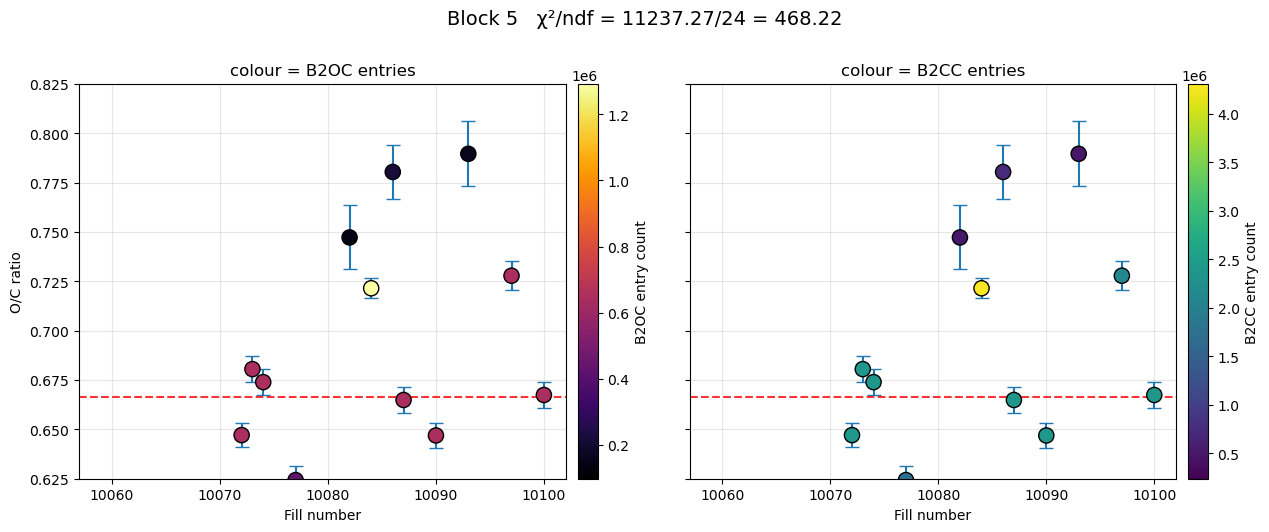

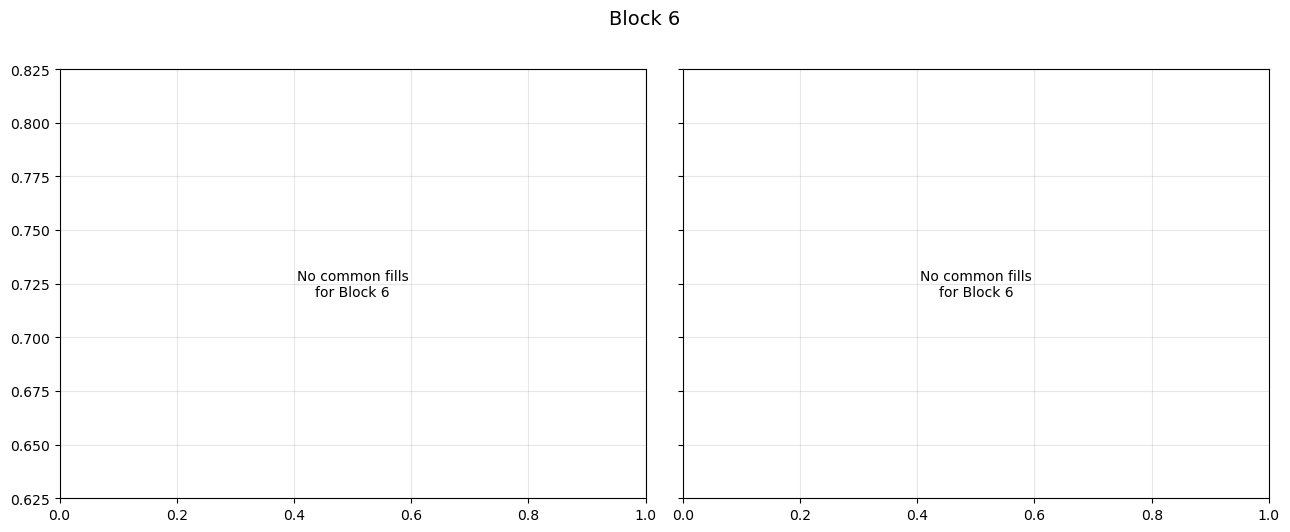

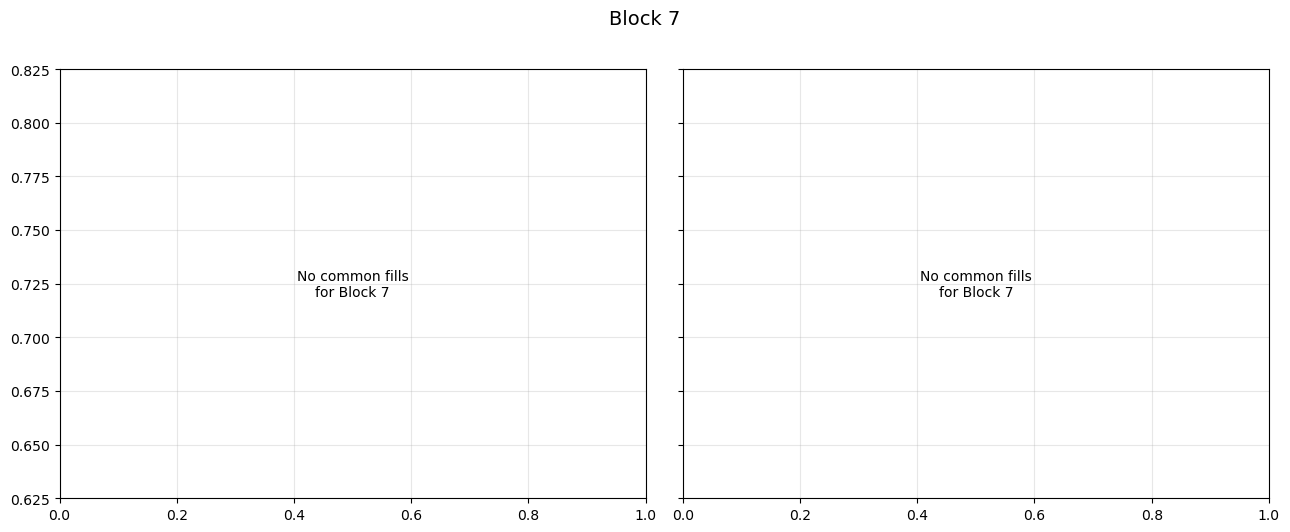

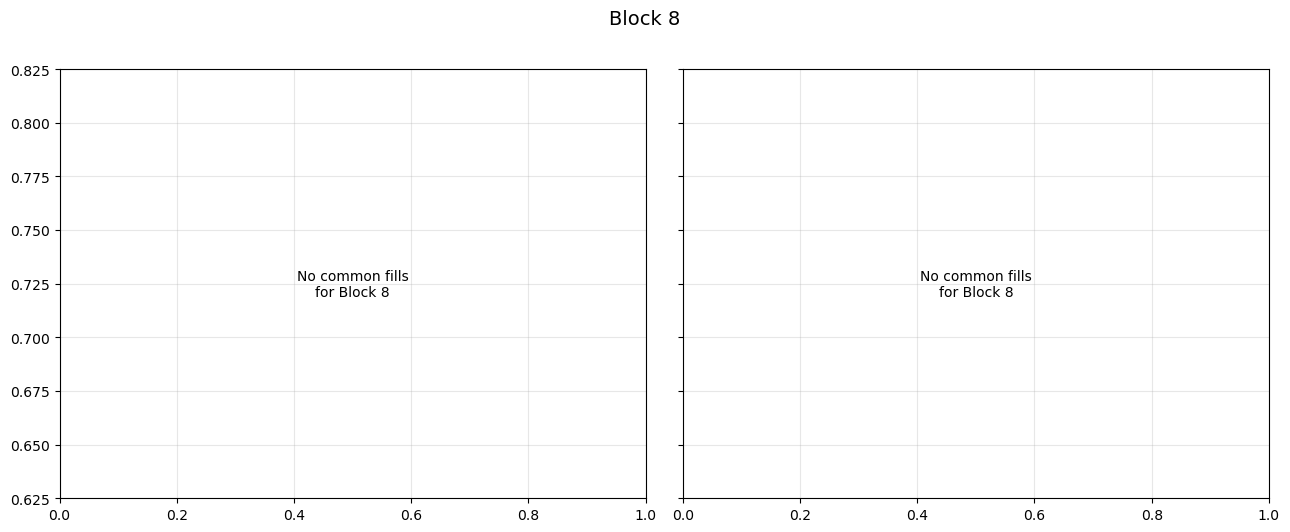

In [1]:
# ---------------------------------------------------------------
# Blocks 5–8 — O/C ratio vs fill (two panels per block)
# Left: colour = B2OC entry count | Right: colour = B2CC entry count
# Title: Block X   χ²/ndf = <chi2>/<ndf> = <ratio>
# ---------------------------------------------------------------
from pathlib import Path
import re
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
import uproot

# ----------- settings -----------
ROOT_DIR = Path("./FDCBpPS")
blocks_to_plot = [5, 6, 7, 8]
ymin, ymax = 0.625, 0.825   # slide-like y-range
point_size = 120
# --------------------------------

# 1) build (path, nsig±err) list ONLY for files that have fit_results
pairs = []
for fpath in sorted(p for p in ROOT_DIR.glob("*.root") if p.is_file()):
    try:
        with uproot.open(fpath) as rf:
            if "fit_results" not in rf:
                continue
            tr = rf["fit_results"]
            nsig     = tr["nsig"    ].array(library="np")
            nsig_err = tr["nsig_err"].array(library="np")
            pairs.append((fpath, unp.uarray(nsig, nsig_err)))
    except Exception:
        continue

# 2) collect totals and entry counts per (campaign, block, fill)
tot = {"B2OC": {b:{} for b in blocks_to_plot}, "B2CC": {b:{} for b in blocks_to_plot}}
nentries = {"B2OC": {b:{} for b in blocks_to_plot}, "B2CC": {b:{} for b in blocks_to_plot}}

re_block = re.compile(r"_B(\d+)_", re.IGNORECASE)
re_fill  = re.compile(r"_F(\d+)",   re.IGNORECASE)

for fpath, arr_u in pairs:
    fname = fpath.name.upper()
    mB = re_block.search(fname);  mF = re_fill.search(fname)
    if not (mB and mF): 
        continue
    block = int(mB.group(1)); fill = int(mF.group(1))
    if block not in blocks_to_plot:
        continue

    if   "B2OC" in fname: camp, treename = "B2OC", "ST-b2oc"
    elif "B2CC" in fname: camp, treename = "B2CC", "ST-b2cc"
    else: continue

    tot[camp][block][fill] = arr_u.sum()

    # entry count for heat colour
    try:
        with uproot.open(fpath) as rf:
            nentries[camp][block][fill] = int(rf[treename].num_entries) if treename in rf else np.nan
    except Exception:
        nentries[camp][block][fill] = np.nan

# 3) plotting helper for one block
def plot_block(block):
    fills_all = sorted(set(tot["B2OC"][block]) & set(tot["B2CC"][block]))
    fig, axs = plt.subplots(1, 2, figsize=(13, 5.5), sharey=True)
    axs = axs.ravel()

    title_text = f"Block {block}"

    if len(fills_all) >= 1:
        rat_u   = [tot["B2OC"][block][f] / tot["B2CC"][block][f] for f in fills_all]
        rat_val = unp.nominal_values(rat_u).astype(float)
        rat_err = unp.std_devs(rat_u).astype(float)

        # clean bad points (nan or zero error)
        mask = np.isfinite(rat_val) & np.isfinite(rat_err) & (rat_err > 0)
        fills = np.array(fills_all)[mask]; rat_val = rat_val[mask]; rat_err = rat_err[mask]

        a_fit, sig_a, chi2, ndf = np.nan, np.nan, 0.0, 0
        if len(fills) > 1:
            def const(x, a): return a
            popt, pcov = curve_fit(const, fills.astype(float), rat_val, sigma=rat_err, absolute_sigma=False)
            a_fit = float(popt[0])
            sig_a = float(np.sqrt(pcov[0,0])) if pcov.size else np.nan
            chi2  = float(np.sum(((rat_val - a_fit)/rat_err)**2))
            ndf   = len(fills) - 1
            chi2rd = chi2/ndf if ndf>0 else 0.0
            title_text = f"Block {block}   χ²/ndf = {chi2:.2f}/{ndf} = {chi2rd:.2f}"
        else:
            # single fill only
            fills = np.array(fills_all)
            title_text = f"Block {block} (single fill)"

        # Left: colour = B2OC entries
        ax = axs[0]
        ax.errorbar(fills, rat_val, yerr=rat_err, fmt='o', capsize=5,
                    color='tab:blue', ecolor='tab:blue', label=f"B2OC / B2CC (Block {block})")
        heat_oc = np.array([nentries["B2OC"][block].get(int(f), np.nan) for f in fills])
        sc1 = ax.scatter(fills, rat_val, c=heat_oc, s=point_size, edgecolors='k', cmap='inferno', zorder=3)
        if ndf>0: ax.axhline(a_fit, ls='--', color='red', alpha=0.8)
        ax.set_title("colour = B2OC entries")
        ax.set_xlabel("Fill number"); ax.set_ylabel("O/C ratio")
        ax.set_ylim(ymin, ymax); ax.grid(True, alpha=0.3)
        cb1 = fig.colorbar(sc1, ax=ax, pad=0.02); cb1.set_label("B2OC entry count")

        # Right: colour = B2CC entries
        ax = axs[1]
        ax.errorbar(fills, rat_val, yerr=rat_err, fmt='o', capsize=5,
                    color='tab:blue', ecolor='tab:blue')
        heat_cc = np.array([nentries["B2CC"][block].get(int(f), np.nan) for f in fills])
        sc2 = ax.scatter(fills, rat_val, c=heat_cc, s=point_size, edgecolors='k', cmap='viridis', zorder=3)
        if ndf>0: ax.axhline(a_fit, ls='--', color='red', alpha=0.8)
        ax.set_title("colour = B2CC entries")
        ax.set_xlabel("Fill number")
        ax.set_ylim(ymin, ymax); ax.grid(True, alpha=0.3)
        cb2 = fig.colorbar(sc2, ax=ax, pad=0.02); cb2.set_label("B2CC entry count")

    else:
        # no common fills
        for ax in axs:
            ax.text(0.5, 0.5, f"No common fills\nfor Block {block}",
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_ylim(ymin, ymax); ax.grid(True, alpha=0.3)

    fig.suptitle(title_text, y=0.96, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 4) draw all four blocks
for b in blocks_to_plot:
    plot_block(b)


In [74]:
import ROOT as r

file_name = "2024_B2CC_DOWN_B6_F10105.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("jpsik_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()


Deleted 'fit_results' tree.
Deleted 'jpsik_mass_fit_block6_fill10105'
Deleted 'jpsik_mass_fit_block6_fill10105_log'


In [ ]:
from array import array                     # ROOT TTrees need C-style arrays
import re
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
files = [
    "2024_B2CC_DOWN_B6_F10105.root"
]

# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5200, 5450)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5279.38, 5250, 5300)

tau = r.RooRealVar("tau", "Decay constant", -0.00107319, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha = r.RooRealVar("alpha", "alpha", 1.59501, 0.1, 2)
n = r.RooRealVar("n", "n", 2.75673, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 7.2753, 5, 10)
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -1.29179, -1.5, -0.1)
n_2 = r.RooRealVar("n2", "n2", 5.29, 0.5, 10)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 8.21279, 5, 10)
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.5, 0.0, 1.0)


mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(False)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting Block file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2cc")
    if not tree:
        print("ST-b2cc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 0.4)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.75, Nevt * 0.6, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError()) # background fraction, propagated uncertainty 
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # 4) store results in /fit_results TTree  (create once, then append)
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        # function to create branches
        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        # Attach them to the branches
        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        res_tree.GetBranch("status").SetAddress(br_status)
        res_tree.GetBranch("covQual").SetAddress(br_covqual)

    # 5) fill the branch values

    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u         
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F"), r.RooFit.LineColor(r.kGreen + 2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))
    
    
    match = re.search(r'_B(\d+)(?:_F(\d+))?\.root$', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match and match.group(2) else ""
    title_latex = "B^{+} \\rightarrow J/\psi K^{+}"

    canvas_name = f"jpsik_mass_fit_block{match.group(1)}_fill{match.group(2)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str} {fill_str}" if match else f"{fname} mass fit"


    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetYaxis().SetTitle("Candidates / (2.5 MeV/c^{2})")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+2)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    # Automatic y-axis minimum for log scale 
    x_min_bg = 5400 
    x_max_bg = 5450
    n_bins = 100
    bin_width = (x.getMax() - x.getMin()) / n_bins
    n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    # Save log-y version
    frame.SetMinimum(ymin * 0.8)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()


<>:220: SyntaxWarning: invalid escape sequence '\p'
<>:220: SyntaxWarning: invalid escape sequence '\p'
C:\Users\paolo\AppData\Local\Temp\ipykernel_18068\2311953038.py:220: SyntaxWarning: invalid escape sequence '\p'
  title_latex = "B^{+} \\rightarrow J/\psi K^{+}"



▶ fitting Block file 2024_B2CC_DOWN_B6_F10105.root
entries in tree = 1169484

=== fitted yields ===
nsig  = 92357 ± 672
nbkg  = 1077161 ± 1199
ntot  = 1169519 (derived)
0.5324671310544481
background fraction = 0.921030+/-0.000535
fit status = 3, covQual = 3
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Bp_DTF_OwnPV_MASS) TTree Float_t branch Bp_DTF_OwnPV_MASS will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5484.76
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5744.34
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #4 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5458.47
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #5 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5586.45
[#1] INFO:DataHandling --

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Evaluated function and gradient in 1.41166 s
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -8676187.573 Edm =       123211.0839 NCalls =     33
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 5.69173
Info in <Minuit2>: MnHesse Done after 2.15031 s
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -8676187.573
  Edm           : 18439.92399
  Internal parameters:	[    -0.0900014567     0.2891274493                0     0.1761089065    -0.1433475689     0.1433475689      1.505265445]	
  Internal gradient  :	[      -9446.48179     -9509.185743       -4484.5339      1777.338547     -26556.20201      79668.40316     -121600.6517]	
  Internal covariance matrix:
[[    0.051716308   -0.017964991   -0.065481911  8.5464803e-05 -7.6721985e-06  2.2761904e-05  2.6504162e-05]
 [   -0.017964991   0.00630

In [76]:
# ------------------------------------------------------------
file_name = "2024_B2CC_DOWN_B6_F10105.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("jpsik_mass_fit_block6_fill10105_log")  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")



--- top-level keys in the file -------------------------
  ST-b2cc : TTree
  ST-b2cc : TTree
  fit_results : TTree
  jpsik_mass_fit_block6_fill10105 : TCanvas
  jpsik_mass_fit_block6_fill10105_log : TCanvas

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err

entries in the tree: 1

first entry snapshot:
  mean   = 5279.325037148736 ± 0.07282126123709531
  nsig   = 92357.21897328968 ± 671.8648738506818
  nbkg   = 1077161.4311956258 ± 1198.6292903397698
  ntot   = 1169518.6501689155 ± 1374.0868183542161
  frac_cb_2   = 0.5324671310544481


# Functions

# Monte Carlo mass fits

## Monte Carlo mass fit, $B^+ \rightarrow \bar{D}^0\pi^+$ 


In [26]:
import ROOT as r

file_name = "2024_MC_B2OC_DOWN_B7.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("dpi_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()


Deleted 'fit_results' tree.
Deleted 'dpi_mc_mass_fit_block7'
Deleted 'dpi_mc_mass_fit_block7_log'


In [27]:
from array import array                     # ROOT TTrees need C-style arrays
import re                   
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
files = [
    "2024_MC_B2OC_DOWN_B7.root",
    
]

# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 4900, 5950)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5278.46, 5250, 5300)

alpha = r.RooRealVar("alpha", "alpha", 1.25015, 1, 2)
n = r.RooRealVar("n", "n", 2.40748, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 11, 1.0, 30)  
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

tau = r.RooRealVar("tau", "Decay constant", -0.00219122, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -2.2701, -20, -0.01)
n_2 = r.RooRealVar("n2", "n2", 2.47972, 0.05, 50)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 12.7184, 1.0, 20)   
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.65, 0.0, 1.0)

mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(False)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting block file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2oc")
    if not tree:
        print("ST-b2oc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.5, Nevt * 0.05, Nevt * 1)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.1, Nevt * 0.0, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError()) # background fraction, propagated uncertainty 
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # 4) store results in /fit_results TTree  (create once, then append)
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        # function to create branches
        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = make_branch("status")
        br_covqual        = make_branch("covQual")
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        # Attach them to the branches
        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        res_tree.GetBranch("status").SetAddress(br_status)
        res_tree.GetBranch("covQual").SetAddress(br_covqual)

    # 5) fill the branch values

    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u         
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background),r.RooFit.FillColor(r.kGreen + 3),r.RooFit.FillStyle(3001),r.RooFit.DrawOption("F"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.LineColor(r.kGreen+2), r.RooFit.LineStyle(r.kDashed))
 
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue)) , r.RooFit.FillColor(r.kGreen + 2), r.RooFit.FillStyle(3001), r.RooFit.DrawOption("F")
    
    match = re.search(r'_B(\d+)(?:_F(\d+))?\.root$', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match and match.group(2) else ""
    title_latex = "B^{+} \\rightarrow \\bar{D}^{0}\\pi^{+}" 

    canvas_name = f"dpi_mc_mass_fit_block{match.group(1)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str}" if match else f"{fname} mass fit"

    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+3)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    # Automatic y-axis minimum for log scale 
    #x_min_bg = 5400 
    #x_max_bg = 5450
    #n_bins = 100
    #bin_width = (x.getMax() - x.getMin()) / n_bins
    #n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    #ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))
#
    # Save log-y version
    frame.SetMinimum(0.3)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()



▶ fitting block file 2024_MC_B2OC_DOWN_B7.root
entries in tree = 59763

=== fitted yields ===
nsig  = 59294 ± 246
nbkg  = 475 ± 36
ntot  = 59769 (derived)
0.7262774299871978
background fraction = 0.007953+/-0.000605
fit status = 0, covQual = 3
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Bp_DTF_OwnPV_MASS) TTree Float_t branch Bp_DTF_OwnPV_MASS will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1863 because Bp_DTF_OwnPV_MASS cannot accommodate the value 4871.36
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3106 because Bp_DTF_OwnPV_MASS cannot accommodate the value 4898.38
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #4688 because Bp_DTF_OwnPV_MASS cannot accommodate the value 4888.02
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #4793 because Bp_DTF_OwnPV_MASS cannot accommodate the value 6096.33
[#1] INFO:DataHandling -- R

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Evaluated function and gradient in 66.6395 ms
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -324915.3285 Edm =        8870.63587 NCalls =     33
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.315893
Info in <Minuit2>: MnHesse Done after 94.4425 ms
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -324915.3285
  Edm           : 7350.98971
  Internal parameters:	[    -0.3155557491     0.2356918764      0.304692654     0.1388456842     -0.909951031   -0.05265590826      1.477141165]	
  Internal gradient  :	[     -1779.921638     -3681.926879      -883.282287     -4684.277411      8317.038908     -25384.80995      592.7171996]	
  Internal covariance matrix:
[[    0.046062002   -0.024919632   -0.060767527  0.00083586465  -0.0040843837  0.00091691214  0.00026121333]
 [   -0.024919632    0.01

In [28]:
# ------------------------------------------------------------
file_name = "2024_MC_B2OC_DOWN_B7.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("dpi_mc_mass_fit_block7_log")  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")



--- top-level keys in the file -------------------------
  ST-b2oc : TTree
  fit_results : TTree
  dpi_mc_mass_fit_block7 : TCanvas
  dpi_mc_mass_fit_block7_log : TCanvas

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err
  status
  covQual

entries in the tree: 1

first entry snapshot:
  mean   = 5278.522580086098 ± 0.06494910988021729
  nsig   = 59294.08413221724 ± 246.0059488187544
  nbkg   = 475.32463891999157 ± 36.3804046650782
  ntot   = 59769.408771137234 ± 248.68144421691468
  frac_cb_2   = 0.7262774299871978


## Monte Carlo mass fit,  $B^+ \rightarrow J/\psi K^+$ 


In [23]:
import ROOT as r

file_name = "2024_MC_B2CC_UP_B8.root"  # Change as needed
f = r.TFile.Open(file_name, "UPDATE")
if f.Get("fit_results"):
    f.Delete("fit_results;*")
    print("Deleted 'fit_results' tree.")
else:
    print("'fit_results' tree not found.")

# Collect all keys to delete
to_delete = []
for key in f.GetListOfKeys():
    name = key.GetName()
    if name.startswith("jpsik_"):
        to_delete.append(name)

# Delete them
for name in to_delete:
    f.Delete(f"{name};*")
    print(f"Deleted '{name}'")

f.Close()


'fit_results' tree not found.


In [24]:
from array import array                     # ROOT TTrees need C-style arrays
import re
r.EnableImplicitMT()                        # enable multi-threading in RooFit

# 1) list of files
files = [
    "2024_MC_B2CC_UP_B8.root"
]

# 2) shape parameters
x     = r.RooRealVar("Bp_DTF_OwnPV_MASS", "B^{+} mass", 5050, 5550)    # MeV/c² window

mean = r.RooRealVar("mean", "mean", 5279.38, 5250, 5300)

tau = r.RooRealVar("tau", "Decay constant", -0.00107319, -1, 0)
background = r.RooExponential("background", "Exponential background", x, tau)

alpha = r.RooRealVar("alpha", "alpha", 1.59501, 0.1, 2)
n = r.RooRealVar("n", "n", 2.75673, 0.5, 5)
cb_sigma = r.RooRealVar("cb_sigma", "cb_sigma", 7.2753, 5, 10)
crystal_ball = r.RooCBShape("crystal_ball", "Crystal ball PDF", x, mean, cb_sigma, alpha, n)

alpha_2 = r.RooRealVar("alpha2", "alpha2", -1.29179, -1.5, -0.1)
n_2 = r.RooRealVar("n2", "n2", 5.29, 0.5, 10)
cb_sigma_2 = r.RooRealVar("cb_sigma2", "cb_sigma2", 8.21279, 5, 10)
crystal_ball_2 = r.RooCBShape("crystal_ball2", "Crystal ball PDF 2", x, mean, cb_sigma_2, alpha_2, n_2)

frac_cb_2 = r.RooRealVar("frac_cb_2", "Fraction of crystal ball 2", 0.5, 0.0, 1.0)


mean.setConstant(False)
alpha.setConstant(True)
n.setConstant(True)
cb_sigma.setConstant(False)
tau.setConstant(False)
alpha_2.setConstant(True)
n_2.setConstant(True)
cb_sigma_2.setConstant(False)
frac_cb_2.setConstant(False)

# 3) loop over files (fills)
for fname in files:

    print(f"\n▶ fitting Block file {fname}")

    f = r.TFile.Open(fname, "UPDATE")          # UPDATE keeps existing content
    tree = f.Get("ST-b2cc")
    if not tree:
        print("ST-b2cc tree not found, skipping");  f.Close();  continue

    # convert to RooDataSet
    data  = r.RooDataSet("data", "data", r.RooArgSet(x), r.RooFit.Import(tree))
    Nevt  = data.numEntries()
    print(f"entries in tree = {Nevt}")

    nsig = r.RooRealVar("nsig", "yield sig", Nevt * 0.25, Nevt * 0.05, Nevt * 1)
    nbkg = r.RooRealVar("nbkg", "yield bkg", Nevt * 0.1, Nevt * 0.0, Nevt * 0.95)
    ntot = r.RooFormulaVar("ntot","@0+@1", r.RooArgList(nsig, nbkg))
    sig_pdf = r.RooAddPdf("sig","", r.RooArgList(crystal_ball_2, crystal_ball,),
                                    r.RooArgList(frac_cb_2))

    model = r.RooAddPdf("model","sig+bkg", r.RooArgList(sig_pdf, background),
                                         r.RooArgList(nsig,    nbkg))

    fit_res = model.fitTo(data, r.RooFit.Save(True), r.RooFit.Strategy(2))

    print("\n=== fitted yields ===")
    print(f"nsig  = {nsig.getVal():.0f} ± {nsig.getError():.0f}")
    print(f"nbkg  = {nbkg.getVal():.0f} ± {nbkg.getError():.0f}")
    print(f"ntot  = {ntot.getVal():.0f} (derived)")
    print(frac_cb_2.getVal())
    sig_u = ufloat(nsig.getVal(), nsig.getError()) # background fraction, propagated uncertainty 
    bkg_u = ufloat(nbkg.getVal(), nbkg.getError())
    frac_bkg = bkg_u / (sig_u + bkg_u)

    print(f"background fraction = {frac_bkg:.6f}")
    print(f"fit status = {fit_res.status()}, covQual = {fit_res.covQual()}")

    # 4) store results in /fit_results TTree  (create once, then append)
    f.cd()
    res_tree = f.Get("fit_results")
    
    if not res_tree:
        res_tree = r.TTree("fit_results", "Mass-fit results per fill")

        # function to create branches
        def make_branch(name):
            buf = array('d', [0.])
            res_tree.Branch(name, buf, f"{name}/D")
            return buf
        br_mean           = make_branch("mean")
        br_mean_e         = make_branch("mean_err")
        br_alpha          = make_branch("alpha1")
        br_alpha_e        = make_branch("alpha1_err")
        br_n              = make_branch("n1")
        br_n_e            = make_branch("n1_err")
        br_cb_sigma       = make_branch("cb_sigma1")
        br_cb_sigma_e     = make_branch("cb_sigma1_err")
        br_tau            = make_branch("tau")
        br_tau_e          = make_branch("tau_err")
        br_alpha_2        = make_branch("alpha2")
        br_alpha_2_e      = make_branch("alpha2_err")
        br_n_2            = make_branch("n2")
        br_n_2_e          = make_branch("n2_err")
        br_cb_sigma_2     = make_branch("cb_sigma2")
        br_cb_sigma_2_e   = make_branch("cb_sigma2_err")
        br_frac_cb_2      = make_branch("frac_cb_2")
        br_frac_cb_2_e    = make_branch("frac_cb_2_err")
        br_Nevt           = make_branch("Nevt")          
        br_nsig           = make_branch("nsig")
        br_nsig_e         = make_branch("nsig_err")
        br_nbkg           = make_branch("nbkg")
        br_nbkg_e         = make_branch("nbkg_err")
        br_ntot           = make_branch("ntot")
        br_ntot_e         = make_branch("ntot_err")
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])
    else:
        br_mean           = array('d', [0.])
        br_mean_e         = array('d', [0.])
        br_alpha          = array('d', [0.])
        br_alpha_e        = array('d', [0.])
        br_n              = array('d', [0.])
        br_n_e            = array('d', [0.])
        br_cb_sigma       = array('d', [0.])
        br_cb_sigma_e     = array('d', [0.])
        br_tau            = array('d', [0.])
        br_tau_e          = array('d', [0.])
        br_alpha_2        = array('d', [0.])
        br_alpha_2_e      = array('d', [0.])
        br_n_2            = array('d', [0.])
        br_n_2_e          = array('d', [0.])
        br_cb_sigma_2     = array('d', [0.])
        br_cb_sigma_2_e   = array('d', [0.])
        br_frac_cb_2      = array('d', [0.])
        br_frac_cb_2_e    = array('d', [0.])
        br_Nevt           = array('d', [0.])
        br_nsig           = array('d', [0.])
        br_nsig_e         = array('d', [0.])
        br_nbkg           = array('d', [0.])
        br_nbkg_e         = array('d', [0.])
        br_ntot           = array('d', [0.])
        br_ntot_e         = array('d', [0.])
        br_status         = array('i', [0])
        br_covqual        = array('i', [0])

        # Attach them to the branches
        res_tree.GetBranch("mean").SetAddress(br_mean)
        res_tree.GetBranch("mean_err").SetAddress(br_mean_e)
        res_tree.GetBranch("alpha1").SetAddress(br_alpha)
        res_tree.GetBranch("alpha1_err").SetAddress(br_alpha_e)
        res_tree.GetBranch("n1").SetAddress(br_n)
        res_tree.GetBranch("n1_err").SetAddress(br_n_e)
        res_tree.GetBranch("cb_sigma1").SetAddress(br_cb_sigma)
        res_tree.GetBranch("cb_sigma1_err").SetAddress(br_cb_sigma_e)
        res_tree.GetBranch("tau").SetAddress(br_tau)
        res_tree.GetBranch("tau_err").SetAddress(br_tau_e)
        res_tree.GetBranch("alpha2").SetAddress(br_alpha_2)
        res_tree.GetBranch("alpha2_err").SetAddress(br_alpha_2_e)
        res_tree.GetBranch("n2").SetAddress(br_n_2)
        res_tree.GetBranch("n2_err").SetAddress(br_n_2_e)
        res_tree.GetBranch("cb_sigma2").SetAddress(br_cb_sigma_2)
        res_tree.GetBranch("cb_sigma2_err").SetAddress(br_cb_sigma_2_e)
        res_tree.GetBranch("frac_cb_2").SetAddress(br_frac_cb_2)
        res_tree.GetBranch("frac_cb_2_err").SetAddress(br_frac_cb_2_e)
        res_tree.GetBranch("Nevt").SetAddress(br_Nevt)
        res_tree.GetBranch("nsig").SetAddress(br_nsig)
        res_tree.GetBranch("nsig_err").SetAddress(br_nsig_e)
        res_tree.GetBranch("nbkg").SetAddress(br_nbkg)
        res_tree.GetBranch("nbkg_err").SetAddress(br_nbkg_e)
        res_tree.GetBranch("ntot").SetAddress(br_ntot)
        res_tree.GetBranch("ntot_err").SetAddress(br_ntot_e)
        res_tree.GetBranch("status").SetAddress(br_status)
        res_tree.GetBranch("covQual").SetAddress(br_covqual)

    # 5) fill the branch values

    br_mean[0]            = mean.getVal()
    br_mean_e[0]          = mean.getError()
    br_alpha[0]           = alpha.getVal()
    br_alpha_e[0]         = alpha.getError()
    br_n[0]               = n.getVal()
    br_n_e[0]             = n.getError()
    br_cb_sigma[0]        = cb_sigma.getVal()
    br_cb_sigma_e[0]      = cb_sigma.getError()
    br_tau[0]             = tau.getVal()
    br_tau_e[0]           = tau.getError()
    br_alpha_2[0]         = alpha_2.getVal()
    br_alpha_2_e[0]       = alpha_2.getError()
    br_n_2[0]             = n_2.getVal()
    br_n_2_e[0]           = n_2.getError()
    br_cb_sigma_2[0]      = cb_sigma_2.getVal()
    br_cb_sigma_2_e[0]    = cb_sigma_2.getError()
    br_frac_cb_2[0]       = frac_cb_2.getVal()
    br_frac_cb_2_e[0]     = frac_cb_2.getError()
    br_Nevt[0]            = Nevt
    br_nsig[0]            = nsig.getVal();        br_nsig_e[0]   = nsig.getError()
    br_nbkg[0]            = nbkg.getVal();        br_nbkg_e[0]   = nbkg.getError()
    ntot_u                = sig_u + bkg_u         
    br_ntot[0]            = ntot_u.n;             br_ntot_e[0]   = ntot_u.s
    br_status[0]          = fit_res.status();     br_covqual[0]  = fit_res.covQual()

    res_tree.Fill()
    res_tree.Write("", r.TObject.kOverwrite)

    # 5) make & save the canvas (linear + log)
    frame = x.frame(r.RooFit.Title(f"{fname} mass fit"))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kWhite), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.Components(background),r.RooFit.FillColor(r.kGreen + 3),r.RooFit.FillStyle(3001),r.RooFit.DrawOption("F"))
    model.plotOn(frame, r.RooFit.Components(background), r.RooFit.LineColor(r.kGreen+2), r.RooFit.LineStyle(r.kDashed))
    data.plotOn(frame, r.RooFit.MarkerStyle(20), r.RooFit.LineColor(r.kBlack), r.RooFit.DrawOption("PE0"))
    model.plotOn(frame, r.RooFit.LineColor(r.kRed), r.RooFit.Name("total_curve"))
    model.plotOn(frame, r.RooFit.Components(crystal_ball), r.RooFit.LineStyle(2), r.RooFit.LineColor(r.kBlue))
    model.plotOn(frame, r.RooFit.Components(crystal_ball_2), r.RooFit.LineStyle(3), r.RooFit.LineColor(r.kBlue))

    match = re.search(r'_B(\d+)(?:_F(\d+))?\.root$', fname)
    block_str = f"Block {match.group(1)}" if match else ""
    fill_str = f"Fill {match.group(2)}" if match and match.group(2) else ""
    title_latex = "B^{+} \\rightarrow J/\psi K^{+}"

    canvas_name = f"jpsik_mc_mass_fit_block{match.group(1)}" if match else f"mass_fit_{fname}"
    plot_title = f"{title_latex} Mass Fit, {block_str}" if match else f"{fname} mass fit"

    # Draw frame and save linear-y canvas
    c = r.TCanvas(canvas_name, plot_title, 800, 600)
    frame.SetTitle(plot_title)
    frame.GetXaxis().SetTitle("M(B^{+})  [MeV/c^{2}]")
    frame.GetXaxis().CenterTitle(True)
    frame.GetYaxis().CenterTitle(True)
    frame.Draw()
    legend = r.TLegend(0.72, 0.60, 0.98, 0.88)  # (x1, y1, x2, y2) adjust as needed
    legend.SetTextSize(0.025)
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.AddEntry(frame.findObject("total_curve"), "Total", "l")
    legend.AddEntry(frame.findObject("h_data"), "Data", "lep")
    # For background, add a dummy object for the fill
    dummy_bg = r.TH1F("dummy_bg", "", 1, 0, 1)
    dummy_bg.SetFillColor(r.kGreen+2)
    dummy_bg.SetLineColor(r.kGreen+2)
    dummy_bg.SetFillStyle(3001)
    legend.AddEntry(dummy_bg, "Background", "f")
    legend.Draw()
    c.Write(canvas_name) 

    ## Automatic y-axis minimum for log scale 
    #x_min_bg = 5400 
    #x_max_bg = 5450
    #n_bins = 100
    #bin_width = (x.getMax() - x.getMin()) / n_bins
    #n_bg = data.reduce(f"{x.GetName()} >= {x_min_bg} && {x.GetName()} < {x_max_bg}").numEntries()
    #ymin = max(1, n_bg / ((x_max_bg - x_min_bg) / bin_width))

    # Save log-y version
    frame.SetMinimum(50)
    c.SetLogy()
    c.Write(canvas_name + "_log")

    f.Close()


<>:219: SyntaxWarning: invalid escape sequence '\p'
<>:219: SyntaxWarning: invalid escape sequence '\p'
C:\Users\paolo\AppData\Local\Temp\ipykernel_24524\1166642859.py:219: SyntaxWarning: invalid escape sequence '\p'
  title_latex = "B^{+} \\rightarrow J/\psi K^{+}"



▶ fitting Block file 2024_MC_B2CC_UP_B8.root
entries in tree = 244253

=== fitted yields ===
nsig  = 235449 ± 489
nbkg  = 8806 ± 114
ntot  = 244255 (derived)
0.4335132529310381
background fraction = 0.036053+/-0.000454
fit status = 0, covQual = 3
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Bp_DTF_OwnPV_MASS) TTree Float_t branch Bp_DTF_OwnPV_MASS will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #9 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5705.77
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #17 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5666.54
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #20 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5026.24
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #21 because Bp_DTF_OwnPV_MASS cannot accommodate the value 5650.4
[#1] INFO:DataHandling -- RooTreeD

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Evaluated function and gradient in 262.885 ms
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -1697062.984 Edm =       96930.35125 NCalls =     37
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.71702
Info in <Minuit2>: MnHesse Done after 410.295 ms
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : -1697062.984
  Edm           : 58128.56671
  Internal parameters:	[    -0.0900014567     0.2891274493                0     0.1761089065     -0.909951031    -0.6174371036      1.505265445]	
  Internal gradient  :	[      2754.216819      3196.662722       1303.06832      3304.863295      10804.12914     -251697.8479      1782.603091]	
  Internal covariance matrix:
[[    0.014580689   -0.033792313    0.033008262 -0.00042942648  0.00028299104 -6.7340854e-05 -7.9859223e-05]
 [   -0.033792313    0.07

In [25]:
# ------------------------------------------------------------
file_name = "2024_MC_B2CC_UP_B8.root"   #  << pick any file you just fitted
f = r.TFile.Open(file_name)

print("\n--- top-level keys in the file -------------------------")
for key in f.GetListOfKeys():
    print(" ", key.GetName(), ":", key.GetClassName())

# ------------------------------------------------------------
# 1) check the fit_results tree and its branches
# ------------------------------------------------------------
res_tree = f.Get("fit_results")
if not res_tree:
    print("fit_results tree NOT found!")
else:
    print("\n--- fit_results branches ------------------------------")
    for br in res_tree.GetListOfBranches():
        print(" ", br.GetName())
    print("\nentries in the tree:", res_tree.GetEntries())

    # optional: print the first row
    res_tree.GetEntry(0)
    print("\nfirst entry snapshot:")
    print("  mean   =", res_tree.mean,      "±", res_tree.mean_err)
    print("  nsig   =", res_tree.nsig,      "±", res_tree.nsig_err)
    print("  nbkg   =", res_tree.nbkg,      "±", res_tree.nbkg_err)
    print("  ntot   =", res_tree.ntot,      "±", res_tree.ntot_err)
    print("  frac_cb_2   =", res_tree.frac_cb_2)

# ------------------------------------------------------------
# 2) display the saved canvas
# ------------------------------------------------------------
c = f.Get("jpsik_mc_mass_fit_block8_log")  # linear-y canvas
if c:
    c.Draw()                        # will pop up in notebook / X11
else:
    print("canvas object not found; check its name in `f.ls()`")

# if you saved log-y, try:  f.Get("mass_fit_"+file_name+"_log")



--- top-level keys in the file -------------------------
  ST-b2cc : TTree
  ST-b2cc : TTree
  fit_results : TTree
  jpsik_mc_mass_fit_block8 : TCanvas
  jpsik_mc_mass_fit_block8_log : TCanvas

--- fit_results branches ------------------------------
  mean
  mean_err
  alpha1
  alpha1_err
  n1
  n1_err
  cb_sigma1
  cb_sigma1_err
  tau
  tau_err
  alpha2
  alpha2_err
  n2
  n2_err
  cb_sigma2
  cb_sigma2_err
  frac_cb_2
  frac_cb_2_err
  Nevt
  nsig
  nsig_err
  nbkg
  nbkg_err
  ntot
  ntot_err

entries in the tree: 1

first entry snapshot:
  mean   = 5279.374511136003 ± 0.02111946299783085
  nsig   = 235449.28721855782 ± 489.4580676682963
  nbkg   = 8806.166274551615 ± 113.52247429529962
  ntot   = 244255.45349310944 ± 502.4505469951341
  frac_cb_2   = 0.4335132529310381


## FULL BLOCK TIME STABILITY


In [ ]:
# ---------------------------------------------------------------
# Analyze B2OC / B2CC ratio using ENTIRE BLOCK files (not fill-divided)
# ---------------------------------------------------------------
import re
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit

print("ANALYZING ENTIRE BLOCK FILES:")
print("="*60)

# Option 1: Use same files as before (automatic detection)
# Option 2: Specify different directory or files manually
# ROOT_DIR_BLOCKS = Path("/path/to/your/block/files")  # Uncomment and modify if needed
# block_root_files = [p for p in ROOT_DIR_BLOCKS.glob("*.root") if p.is_file()]

# 1) Identify and process entire block files
block_tot = {"B2OC": {}, "B2CC": {}}
block_files_info = []

for path, arr_u in zip(root_files, u_nsig):
    fname = path.name.upper()
    
    # Look for patterns indicating entire block files
    # Typical patterns: "2024_B2OC_UP_B5.root", "2024_B2CC_DOWN_B6.root"
    # (files WITHOUT fill numbers like "_F10059")
    
    # Check if this is NOT a fill-divided file (no _F pattern)
    if re.search(r"_F\d+", fname):
        continue  # Skip fill-divided files
    
    # Extract block number
    block_match = re.search(r"_B(\d+)", fname)
    if not block_match:
        continue
    block = int(block_match.group(1))
    
    # Only process blocks 5, 6, 7, 8
    if block not in [5, 6, 7, 8]:
        continue
    
    # Determine campaign (B2OC vs B2CC)
    if "B2OC" in fname or "DPI" in fname:
        camp = "B2OC"
    elif "B2CC" in fname or "JPSIK" in fname:
        camp = "B2CC"
    else:
        continue
    
    # Extract polarity if present
    polarity = "UNKNOWN"
    if "_UP_" in fname:
        polarity = "UP"
    elif "_DOWN_" in fname:
        polarity = "DOWN"
    
    # Store total yield for this block
    total_yield = arr_u.sum()
    block_tot[camp][block] = total_yield
    
    # Store file info for debugging
    block_files_info.append({
        'file': fname,
        'block': block,
        'campaign': camp,
        'polarity': polarity,
        'yield': total_yield,
        'entries': len(arr_u)
    })
    
    print(f"Processed: {fname}")
    print(f"  Block {block}, {camp}, {polarity}")
    print(f"  Total yield: {total_yield}")
    print(f"  Entries: {len(arr_u)}")
    print()

# 2) Check what blocks we have data for
print(f"\nDATA AVAILABILITY:")
print("-"*40)
print("B2OC blocks:", sorted(block_tot["B2OC"].keys()))
print("B2CC blocks:", sorted(block_tot["B2CC"].keys()))

common_blocks = sorted(set(block_tot["B2OC"].keys()) & set(block_tot["B2CC"].keys()))
print("Common blocks:", common_blocks)

if len(common_blocks) == 0:
    print("\n⚠️  No common blocks found between B2OC and B2CC!")
    print("Check your file naming convention.")
    print("\nFile info found:")
    for info in block_files_info:
        print(f"  {info['file']} → Block {info['block']}, {info['campaign']}")
else:
    # 3) Calculate ratios for entire blocks
    print(f"\nBLOCK-LEVEL RATIO ANALYSIS:")
    print("="*60)
    
    block_ratios_u = []
    block_numbers = []
    
    for block in common_blocks:
        b2oc_yield = block_tot["B2OC"][block]
        b2cc_yield = block_tot["B2CC"][block]
        ratio = b2oc_yield / b2cc_yield
        
        block_ratios_u.append(ratio)
        block_numbers.append(block)
        
        print(f"Block {block}:")
        print(f"  B2OC total: {b2oc_yield}")
        print(f"  B2CC total: {b2cc_yield}")
        print(f"  Ratio: {ratio}")
        print(f"  Relative error: {ratio.std_dev/ratio.nominal_value*100:.2f}%")
        print()
    
    # Extract values and errors for plotting
    ratio_values = unp.nominal_values(block_ratios_u)
    ratio_errors = unp.std_devs(block_ratios_u)
    
    # 4) Plot the ratios
    plt.figure(figsize=(10, 6))
    
    # Plot ratios vs block number
    plt.errorbar(block_numbers, ratio_values, yerr=ratio_errors, 
                fmt='o-', capsize=8, markersize=10, linewidth=2,
                color='darkblue', ecolor='darkblue', 
                label='B2OC / B2CC (Entire Blocks)')
    
    plt.xlabel("Block number", fontsize=12)
    plt.ylabel("B2OC / B2CC ratio", fontsize=12)
    plt.title("B2OC / B2CC Ratio Stability Across Blocks\n(Using Entire Block Files)", fontsize=14)
    plt.grid(True, alpha=0.7)
    plt.xticks(block_numbers)
    
    # 5) Fit to constant if we have multiple blocks
    if len(block_numbers) > 1:
        def const(x, a): return a
        
        # Fit
        popt, pcov = curve_fit(const, block_numbers, ratio_values, sigma=ratio_errors)
        a_fit = popt[0]
        sig_a = np.sqrt(pcov[0,0])
        
        # Chi-square
        chi2 = np.sum(((ratio_values - a_fit)/ratio_errors)**2)
        chi2rd = chi2 / (len(block_numbers) - 1)
        
        # Add fit line
        plt.axhline(a_fit, color='red', linestyle='--', linewidth=2, alpha=0.8,
                   label=f"Constant fit: {a_fit:.4f} ± {sig_a:.4f}")
        
        # Add text with fit info
        plt.text(0.02, 0.98, f"χ²/ndf = {chi2rd:.2f}", 
                transform=plt.gca().transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        print(f"CONSTANT FIT RESULTS:")
        print(f"  Fitted ratio: {a_fit:.6f} ± {sig_a:.6f}")
        print(f"  χ² = {chi2:.2f} for {len(block_numbers)-1} dof")
        print(f"  χ²/ndf = {chi2rd:.2f}")
        
        # Statistical significance of variations
        if len(block_numbers) > 2:
            block_std = np.std(ratio_values, ddof=1)
            block_mean = np.mean(ratio_values)
            print(f"  Block-to-block variation: {block_std/block_mean*100:.3f}%")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 6) Comparison with fill-divided analysis
    print(f"\n" + "="*60)
    print("COMPARISON: Block Files vs Fill-Divided Files")
    print("="*60)
    
    # If we have fill-divided results, compare them
    if 'all_fits' in globals() and len(all_fits) > 0:
        print("Fill-divided analysis results:")
        for block in sorted(all_fits.keys()):
            if block in common_blocks:
                fill_ratio = all_fits[block]['ratio']
                fill_error = all_fits[block]['error']
                
                # Find corresponding block-level result
                block_idx = block_numbers.index(block)
                block_ratio = ratio_values[block_idx]
                block_error = ratio_errors[block_idx]
                
                diff = abs(fill_ratio - block_ratio)
                diff_sigma = diff / np.sqrt(fill_error**2 + block_error**2) if (fill_error**2 + block_error**2) > 0 else 0
                
                print(f"  Block {block}:")
                print(f"    Fill-divided:  {fill_ratio:.4f} ± {fill_error:.4f}")
                print(f"    Entire block:  {block_ratio:.4f} ± {block_error:.4f}")
                print(f"    Difference:    {diff:.4f} ({diff_sigma:.1f}σ)")
                print()
    
    # 7) Summary statistics
    print(f"BLOCK-LEVEL SUMMARY:")
    print("-"*30)
    print(f"Number of blocks analyzed: {len(common_blocks)}")
    print(f"Mean ratio: {np.mean(ratio_values):.6f}")
    print(f"Std deviation: {np.std(ratio_values, ddof=1):.6f}")
    print(f"Relative variation: {np.std(ratio_values, ddof=1)/np.mean(ratio_values)*100:.3f}%")
    
    # Check for outliers
    if len(ratio_values) > 2:
        z_scores = np.abs((ratio_values - np.mean(ratio_values)) / np.std(ratio_values, ddof=1))
        outliers = [block_numbers[i] for i, z in enumerate(z_scores) if z > 2]
        if outliers:
            print(f"Potential outliers (>2σ): Blocks {outliers}")
        else:
            print("No significant outliers detected")

print(f"\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("• Block-level analysis uses entire data blocks (higher statistics)")
print("• Should show smaller errors than fill-divided analysis")
print("• Differences might indicate systematic effects within blocks")
print("• Good agreement validates the fill-divided approach")

Found 132 files
Current file_num = 6
Plotting file 6: 2024_B2CC_DOWN_B6_F10115.root
Found canvas: jpsik_mass_fit_block6_fill10115_log
Canvas displayed!
Next run will show file 7

Tip: To jump to a specific file, run: file_num = 5 (then run this cell)


In [215]:
# ---------------------------------------------------------------
# Simple File Browser: Just iterate through files with a number
# ---------------------------------------------------------------
import ROOT as r
from pathlib import Path
#file_num = 110
# Set your starting file number here (change this to start from any file)
if 'file_num' not in globals():
    file_num = 1  # Start from file 1

# Get all ROOT files
root_files = sorted([f for f in Path(".").glob("*.root") if f.is_file()])

print(f"Found {len(root_files)} files")
print(f"Current file_num = {file_num}")

# Make sure file_num is valid
if file_num > len(root_files):
    file_num = 1
    print(f"Wrapped back to file 1")

# Get current file (convert to 0-based index)
current_file = root_files[file_num - 1]
print(f"Plotting file {file_num}: {current_file.name}")

# Open file and plot canvas
file = r.TFile.Open(str(current_file))

# Find the canvas
canvas = None
for key in file.GetListOfKeys():
    obj_name = key.GetName()
    if "_mass_fit_block" in obj_name and "_fill" in obj_name and "_log" in obj_name:
        canvas = file.Get(obj_name)
        print(f"Found canvas: {obj_name}")
        break

if canvas:
    canvas.Draw()
    canvas.Update()
    print("Canvas displayed!")
else:
    print("No canvas found")

file.Close()

# Increase for next time
file_num += 1
print(f"Next run will show file {file_num}")

# To go to a specific file, just change file_num at the top
print("\nTip: To jump to a specific file, run: file_num = 5 (then run this cell)")

Found 132 files
Current file_num = 132
Plotting file 132: 2024_B2OC_UP_B8_F10232.root
Found canvas: dpi_mass_fit_block8_fill10232_log
Canvas displayed!
Next run will show file 133

Tip: To jump to a specific file, run: file_num = 5 (then run this cell)
